In [2]:
import os
import sys
from pyspark.sql import SparkSession

spark = (SparkSession
    .builder
    .appName("taxis data") 
    .config("spark.executor.memory", "4g") 
    .config("spark.driver.memory", "4g") 
    .config("spark.driver.maxResultSize", "4g") 
    .getOrCreate()
)

    
 

23/05/30 14:46:52 WARN Utils: Your hostname, younes-HP-EliteBook-840-G5 resolves to a loopback address: 127.0.1.1; using 10.31.137.246 instead (on interface wlp1s0)
23/05/30 14:46:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/30 14:46:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/30 14:46:54 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [ ]:
       
    
       import requests
from pathlib import Path

urls = [
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-02.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-03.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-04.parquet",
     "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-04.parquet",
     "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-05.parquet",
     "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-06.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-07.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-08.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-09.parquet",
     "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-10.parquet",
     "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-11.parquet",
      "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-12.parquet",
      "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-03.parquet",
      "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-08.parquet",
      "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-09.parquet",
      "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2019-01.parquet",
      "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2020-01.parquet",
      "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-01.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2022-01.parquet",
]
    

for i, url in enumerate(urls, start=1):
    file_name = f"file{i}.parquet"
    path = Path(file_name)

    # If the file does not exist, download it
    if not path.exists():
        response = requests.get(url)
        with open(file_name, "wb") as f:
            f.write(response.content)
    

In [2]:
#2019 yellow taxi
df_yt1 = spark.read.parquet("file1.parquet")
df_yt2 = spark.read.parquet("file2.parquet")
df_yt3 = spark.read.parquet("file3.parquet")
df_yt4 = spark.read.parquet("file4.parquet")

df_yt5 = spark.read.parquet("file5.parquet")
df_yt6 = spark.read.parquet("file6.parquet")
df_yt7 = spark.read.parquet("file7.parquet")
df_yt8 = spark.read.parquet("file8.parquet")
df_yt9 = spark.read.parquet("file9.parquet")
df_yt10 = spark.read.parquet("file10.parquet")
df_yt11 = spark.read.parquet("file11.parquet")
df_yt12 = spark.read.parquet("file12.parquet")

#2020

df_yt13 = spark.read.parquet("file13.parquet")

#2021
df_yt14 = spark.read.parquet("file14.parquet")
#2022
df_yt15 = spark.read.parquet("file15.parquet")

#thv 
df_thv1 = spark.read.parquet("file16.parquet")
df_thv2 = spark.read.parquet("file17.parquet")
df_thv3 = spark.read.parquet("file18.parquet")
df_thv4 = spark.read.parquet("file19.parquet")



In [3]:
df_thv1.describe()

DataFrame[summary: string, dispatching_base_num: string, PUlocationID: string, DOlocationID: string, SR_Flag: string, Affiliated_base_number: string]

In [5]:
df_yt1.describe()


DataFrame[summary: string, VendorID: string, passenger_count: string, trip_distance: string, RatecodeID: string, store_and_fwd_flag: string, PULocationID: string, DOLocationID: string, payment_type: string, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string, congestion_surcharge: string, airport_fee: string]

# nombre de partition

In [90]:
nb_partitions = df_thv1.rdd.getNumPartitions()
print("Nombre de partitions : ", nb_partitions)

Nombre de partitions :  8


In [8]:
nb_partitions = df_yt1.rdd.getNumPartitions()
print("Nombre de partitions : ", nb_partitions)

Nombre de partitions :  8


In [8]:
from pyspark.sql import Window
import pyspark.sql.functions as func
from pyspark.sql.types import *
from pyspark.sql.functions import col, lit
from pyspark.sql.functions import  max ,  dayofweek

# newark , jfk ,manhattan

In [63]:
newark_zone_id = 1
jfk_zone_id = 132
manhattan_zone_ids = [163 ,236, 238, 243]
zone_id = [163 ,236, 238, 243 ,132 ,1] 



In [64]:
df_yt1 = df_yt1.filter((col("PULocationID").isin(zone_id))&
                           (col("DOLocationID").isin(zone_id)))



# 1.0 Number of Trips by Passenger Count ( janury 2019)

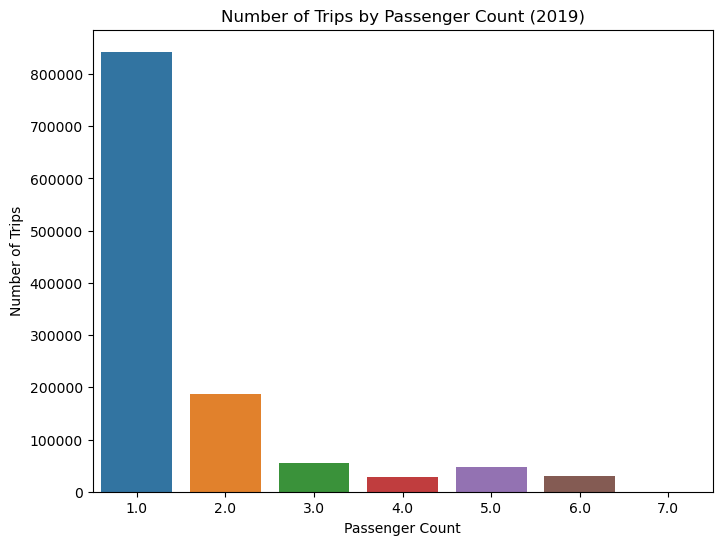

In [65]:
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt
import seaborn as sns

passenger_count_counts = filtered_df.groupBy("passenger_count").count()

passenger_count_counts_filtered = passenger_count_counts.filter((col("passenger_count") != 0) &
                                                                (col("passenger_count") <= 7))

plt.figure(figsize=(8, 6))
sns.barplot(data=passenger_count_counts_filtered.toPandas(), x="passenger_count", y="count")
plt.title("Number of Trips by Passenger Count (2019)")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()



# 1.1 zero passagé yellow taxi 2019

In [66]:


zero_passenger_trips_yellowtaxi = df_yt1.filter(col("passenger_count") == 0)

zero_passenger_trips_yellowtaxi.describe().show()

+-------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+-----------+
|summary|           VendorID|passenger_count|     trip_distance|        RatecodeID|store_and_fwd_flag|      PULocationID|      DOLocationID|      payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|      tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|airport_fee|
+-------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+-----------+
|  count| 

# 1.2 plus 6 passager du mois  janvier 2019

In [67]:

more_six_passenger_trips_yellowtaxi = df_yt1.filter(col("passenger_count") > 6)

more_six_passenger_trips_yellowtaxi.describe().show()


+-------+--------+---------------+-------------+----------+------------------+------------------+------------------+------------+------------------+-----+-------+------------------+------------+---------------------+-----------------+--------------------+-----------+
|summary|VendorID|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|      PULocationID|      DOLocationID|payment_type|       fare_amount|extra|mta_tax|        tip_amount|tolls_amount|improvement_surcharge|     total_amount|congestion_surcharge|airport_fee|
+-------+--------+---------------+-------------+----------+------------------+------------------+------------------+------------+------------------+-----+-------+------------------+------------+---------------------+-----------------+--------------------+-----------+
|  count|       4|              4|            4|         4|                 4|                 4|                 4|           4|                 4|    4|      4|                 4|           4|  

# 1.3 max distance 

In [69]:


max_distance = df_yt1.select(max("trip_distance")).show()

+------------------+
|max(trip_distance)|
+------------------+
|             80.47|
+------------------+



# 1.4 The distribution of the trip_distance (using an histogram for instance) during year 2019

In [215]:
spark = SparkSession.builder.getOrCreate()

parquet_files_2019 = ["file1.parquet", "file2.parquet", "file3.parquet", "file4.parquet", "file5.parquet", 
                      "file6.parquet", "file7.parquet", "file8.parquet", "file9.parquet", "file10.parquet", 
                      "file11.parquet", "file12.parquet"]

df_2019 = spark.read.parquet(*parquet_files_2019)

df_2019_filtered = df_2019.filter((df_2019.trip_distance > 0) & (df_2019.trip_distance < 30))

df_2019_pd = df_2019_filtered.select("trip_distance").toPandas()

plt.figure(figsize=(10,6))
plt.hist(df_2019_pd['trip_distance'], bins=30, edgecolor='black')
plt.title('Distribution of Trip Distance in 2019')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

23/05/24 15:59:30 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks 
java.io.IOException: Connecting to /172.20.10.8:37985 timed out (120000 ms)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:285)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:218)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.start(RetryingBlockTransferor.java:133)
	at org.apache.spark.network.netty.NettyBlockTransferService.fetchBlocks(NettyBlockTransferService.scala:146)
	at org.apache.spark.network.BlockTransferService.fetchBlockSync(BlockTransferService.scala:102)
	at org.apache.spark.storage.BlockManager.fetchRemoteManagedB

23/05/24 16:01:35 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 1 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:214)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecuto

23/05/24 16:03:40 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 2 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:214)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecuto

23/05/24 16:05:45 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 3 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:214)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecuto

Py4JJavaError: An error occurred while calling o4655.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 7 in stage 727.0 failed 1 times, most recent failure: Lost task 7.0 in stage 727.0 (TID 1104) (172.20.10.8 executor driver): TaskResultLost (result lost from block manager)
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2293)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:424)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3688)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:3858)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:510)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3856)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3856)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3685)
	at jdk.internal.reflect.GeneratedMethodAccessor242.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


# 2.1 The explain method or have a look at the Spark UI

In [70]:
from pyspark.sql import SparkSession

df_yt3.createOrReplaceTempView("taxis")

df = spark.sql("SELECT * FROM taxis WHERE passenger_count = 0")
df.explain(extended=True)

== Parsed Logical Plan ==
'Project [*]
+- 'Filter ('passenger_count = 0)
   +- 'UnresolvedRelation [taxis], [], false

== Analyzed Logical Plan ==
VendorID: bigint, tpep_pickup_datetime: timestamp, tpep_dropoff_datetime: timestamp, passenger_count: double, trip_distance: double, RatecodeID: double, store_and_fwd_flag: string, PULocationID: bigint, DOLocationID: bigint, payment_type: bigint, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, total_amount: double, congestion_surcharge: double, airport_fee: int
Project [VendorID#76L, tpep_pickup_datetime#77, tpep_dropoff_datetime#78, passenger_count#79, trip_distance#80, RatecodeID#81, store_and_fwd_flag#82, PULocationID#83L, DOLocationID#84L, payment_type#85L, fare_amount#86, extra#87, mta_tax#88, tip_amount#89, tolls_amount#90, improvement_surcharge#91, total_amount#92, congestion_surcharge#93, airport_fee#94]
+- Filter (passenger_count#79 = cast(0 as double))
  

# 2.2 Do the Analyzed Logical Plan and Optimized Logical Plan differ? Spot the differences if any
   * Plan Logique Analyse :

    Le Plan Logique Analyse comprend une opération Project qui sélectionne toutes les colonnes du DataFrame.
    Il contient une opération Filter qui filtre le DataFrame en fonction de la condition passenger_count#79 = cast(0 as double).
    Le DataFrame est dérivé d'une sous-requête appelée taxis.
    La sous-requête est définie comme une View, ce qui indique qu'elle représente une table virtuelle.
    

   * Plan Logique Optimisé :

    Le Plan Logique Optimisé comprend également une opération Filter avec la même condition de filtrage.
    Il ne comprend pas l'opération Project, ce qui suggère que toutes les colonnes sont déjà incluses dans le DataFrame et aucune projection supplémentaire n'est nécessaire.
    Il n'y a aucune mention de la sous-requête ou de la vue, ce qui indique que l'optimiseur a résolu et aplati la sous-requête, et travaille directement avec la relation sous-jacente.

# 2.2 How would a RDBMS proceed with such a query?


Un SGBDR (Système de Gestion de Base de Données Relationnelle) procéderait à l'exécution d'une requête telle que "SELECT * FROM taxis WHERE passenger_count = 0" en analysant la syntaxe, en effectuant une analyse sémantique pour valider les noms de colonnes et les relations, en optimisant la requête logiquement et physiquement, puis en exécutant le plan physique choisi. Le SGBDR retournerait ensuite les résultats de la requête au client. Le processus vise à optimiser les performances et à garantir des résultats précis.

# 2.3 How does the physical plan differ from the Optimized Logical Plan?

Le plan physique diffère du plan logique optimisé car il indique les étapes spécifiques utilisées pour exécuter la requête. Dans le plan physique, on peut observer les opérations de filtrage, de projection et de numérisation de fichiers qui sont effectuées pour obtenir les résultats finaux. Le plan logique optimisé ne contient que l'opération de filtrage, qui est l'opération principale nécessaire pour cette requête.

# 2.3 What are the keywords you would not expects in a RDBMS? What is their meaning?

ColumnarToRow : Cela indique une conversion de données du format column-store au format row-store, ce qui peut être spécifique à l'implémentation de Spark.

FileScan : Cela indique la numérisation d'un fichier parquet pour lire les données.

InMemoryFileIndex : Cela peut indiquer que les données sont déjà chargées en mémoire, ce qui peut être spécifique à l'environnement d'exécution de Spark.

# 2.4 How many stages are necessary to complete the Spark job?


Job 19 :describe at NativeMethodAccessorImpl.java:0 

Sur la page du job, on trouvere une liste d'étapes  exécutées par ce job. Chaque étape représente une unité de travail dans le traitement des données.
4 etapes pour ce job :

*Scan parquet 
*WholeStageCodegen 
*SortAggregate
*Exchange


# What are the roles of HashAggregate and Exchange hashpartitioning?

le rôle de HashAggregate dans Spark est d'effectuer des agrégations sur les données en utilisant une fonction de hachage pour partitionner les données et calculer les agrégations partielles sur chaque partition telles que SUM, COUNT, AVG, MAX, MIN . Cela permet d'obtenir l'agrégation finale en fusionnant les résultats partiels.

Le rôle de Exchange hashpartitioning est de redistribuer les données entre les nœuds du cluster en utilisant une fonction de hachage pour répartir les données en fonction d'une clé spécifique. Cela facilite le parallélisme et l'exécution efficace des opérations ultérieures, telles que les jointures ou les agrégations.

# 2.5 Does the physical plan perform shuffle operations? If yes how many?

Le plan physique peut ou non impliquer des opérations de shuffle, en fonction de la requête spécifique et des opérations effectuées. Le shuffle se produit lorsque les données doivent être redistribuées à travers le cluster, généralement lors d'opérations telles que les jointures ou les agrégations qui nécessitent la combinaison de données provenant de différentes partitions.

Pour déterminer si le plan physique implique des opérations de shuffle et combien, on inspecte l'interface utilisateur Spark ou examiner le plan physique lui-même.

# 2.6 What are tasks with respect to stages (in Spark language)? How many tasks are your?


Dans le langage de Spark, une tâche (task) est une unité de travail indivisible qui est exécutée sur un seul nœud du cluster. Les tâches sont les unités d'exécution réelles d'un job Spark. Chaque tâche traite une partie des données et effectue les opérations nécessaires sur cette partie.

Un stage dans Spark est une collection de tâches qui peuvent être exécutées en parallèle, sans aucune dépendance entre elles. Un stage est défini par les transformations des données et les actions qui les séparent en différentes étapes d'exécution. Les stages sont généralement déterminés par les opérations de shuffle ou les opérations qui nécessitent un mouvement de données entre les partitions.

on choisit le stage 19 :

on trouve 8 Tasks 



# 3.1 The trip distance distribution for each day of week

In [72]:
df.describe()

DataFrame[summary: string, weekday: string, mean_distance: string]

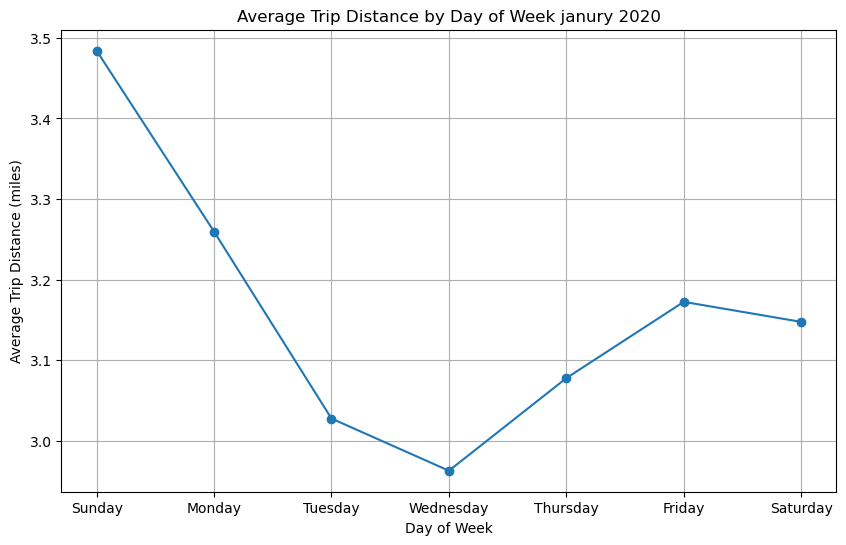

In [220]:
# Compute the average trip distance for each day of week without filtering
df = df_yt13.withColumn("weekday", dayofweek(df_yt13.tpep_pickup_datetime)) \
    .groupBy("weekday") \
    .agg({"trip_distance": "mean"}) \
    .withColumnRenamed("avg(trip_distance)", "mean_distance") \
    .orderBy("weekday")

# Convert your Spark DataFrame to Pandas DataFrame for plotting
pd_df = df.toPandas()

# Set 'weekday' as the index
pd_df.set_index('weekday', inplace=True)

# Sort by weekday to make sure the line plot makes sense
pd_df.sort_index(inplace=True)

# Create a dictionary to map weekday numbers to names
weekday_map = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}

# Replace the numbers with actual day names
pd_df.index = pd_df.index.map(weekday_map)

# Plotting
pd_df['mean_distance'].plot(kind='line', marker='o', figsize=(10,6))
plt.title('Average Trip Distance by Day of Week janury 2020')
plt.ylabel('Average Trip Distance (miles)')
plt.xlabel('Day of Week')
plt.grid()

plt.show()



# 3.2 The number of distinct pickup location

In [74]:
from pyspark.sql.functions import count
# group by pickup location and count the number of occurrences
distinct_pickup_loc = df_yt1.groupBy('PULocationID').agg(count('*').alias('num_pickups'))

# show the results
distinct_pickup_loc.show()


+------------+-----------+
|PULocationID|num_pickups|
+------------+-----------+
|         243|        329|
|         236|      40046|
|           1|        560|
|         132|      19892|
|         163|      18972|
|         238|      20139|
+------------+-----------+



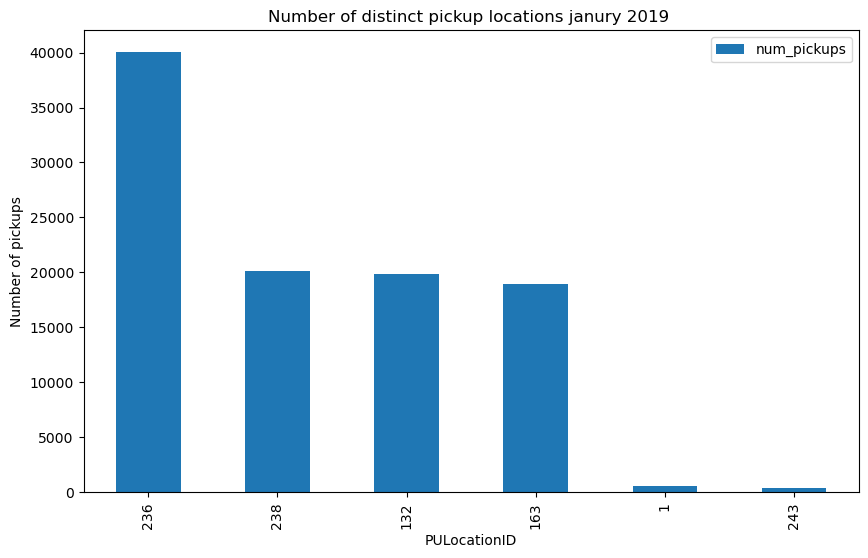

In [221]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
pd_df = distinct_pickup_loc.toPandas()

# Set 'PULocationID' as the index
pd_df = pd_df.set_index('PULocationID')

# Sort by 'num_pickups'
pd_df = pd_df.sort_values('num_pickups', ascending=False)

# Plotting
pd_df.plot(kind='bar', figsize=(10,6))

plt.title('Number of distinct pickup locations janury 2019 ')
plt.ylabel('Number of pickups')
plt.xlabel('PULocationID')

plt.show()

# 3.3 Tips and profits as a function of the pickup location

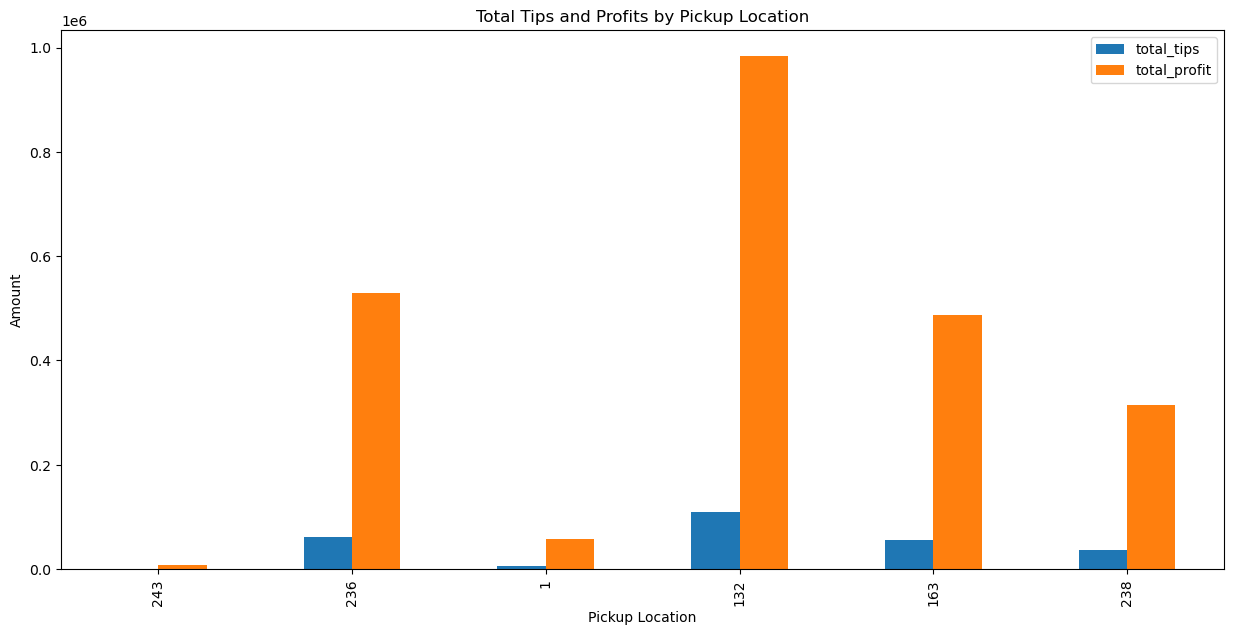

In [82]:
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt

# Convert string columns to float
df_yt1 = df_yt1.withColumn("tip_amount", df_yt1["tip_amount"].cast("float"))
df_yt1 = df_yt1.withColumn("total_amount", df_yt1["total_amount"].cast("float"))

# Compute sum of tips and profits for each pickup location
tips_and_profits = df_yt1.groupBy("PULocationID")\
    .agg(sum("tip_amount").alias("total_tips"),
         sum("total_amount").alias("total_profit"))

# Convert to Pandas DataFrame for plotting
pd_df = tips_and_profits.toPandas()

# Set 'PULocationID' as index
pd_df.set_index('PULocationID', inplace=True)

# Plotting
pd_df[['total_tips', 'total_profit']].plot(kind='bar', figsize=(15, 7))
plt.title('Total Tips and Profits by Pickup Location janury 2019')
plt.ylabel('Amount')
plt.xlabel('Pickup Location')
plt.show()

# Investigate one month of trips data in 2019, 2020, 2021, 2022

In [93]:
df_yt1 = df_yt1.filter(df_yt1.trip_distance > 0)
df_yt13 = df_yt13.filter(df_yt13.trip_distance > 0)
df_yt14 = df_yt14.filter(df_yt14.trip_distance > 0)
df_yt15 = df_yt15.filter(df_yt15.trip_distance > 0)


#df_thv1 = df_thv1.filter(df_thv1.trip_distance > 0)
#df_thv2 = df_thv2.filter(df_thv2.trip_distance > 0)
#df_thv3 = df_thv3.filter(df_thv3.trip_distance > 0)
#df_thv4 = df_thv4.filter(df_thv4.trip_distance > 0)

In [94]:
df_yt1.cache()
df_yt13.cache()
df_yt14.cache()
df_yt15.cache()
df_thv1.cache()
df_thv2.cache()
df_thv3.cache()
df_thv4.cache()

DataFrame[dispatching_base_num: string, pickup_datetime: timestamp, dropOff_datetime: timestamp, PUlocationID: double, DOlocationID: double, SR_Flag: int, Affiliated_base_number: string]

23/05/24 00:50:44 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 3 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:214)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecuto

23/05/24 00:52:49 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 1 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:214)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecuto

23/05/24 00:54:54 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 2 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 timed out (120000 ms)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:285)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:218)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExe

23/05/24 00:56:59 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 3 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 timed out (120000 ms)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:285)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:218)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExe

#  mounth janury 2019

In [146]:
from pyspark.sql.functions import col, dayofweek, hour, when , avg , unix_timestamp , count , minute
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 1-Number of Pickups by Day of Week and Hour of Day

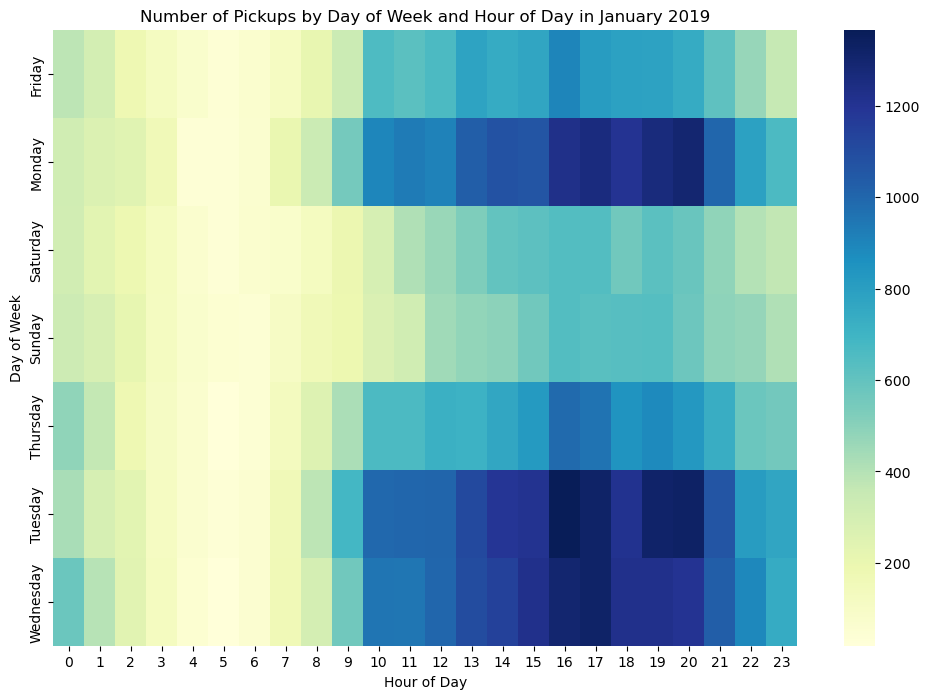

In [105]:


# Group by day of week and hour of day, and count the number of pickups
pickup_ts = df_yt1.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                        hour("tpep_pickup_datetime").alias("hour_of_day")) \
              .count()

# Convert day of week to string representation
pickup_ts = pickup_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Sunday") \
                                 .when(col("day_of_week") == 2, "Monday") \
                                 .when(col("day_of_week") == 3, "Tuesday") \
                                 .when(col("day_of_week") == 4, "Wednesday") \
                                 .when(col("day_of_week") == 5, "Thursday") \
                                 .when(col("day_of_week") == 6, "Friday") \
                                 .when(col("day_of_week") == 7, "Saturday"))

# Sort the data by day of week and hour of day
pickup_ts = pickup_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_pd = pickup_ts.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_pivot = pickup_ts_pd.pivot(index="day_of_week", 
                                     columns="hour_of_day", 
                                     values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day in January 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# 2. The average fare by Day of Week and Hour of Day

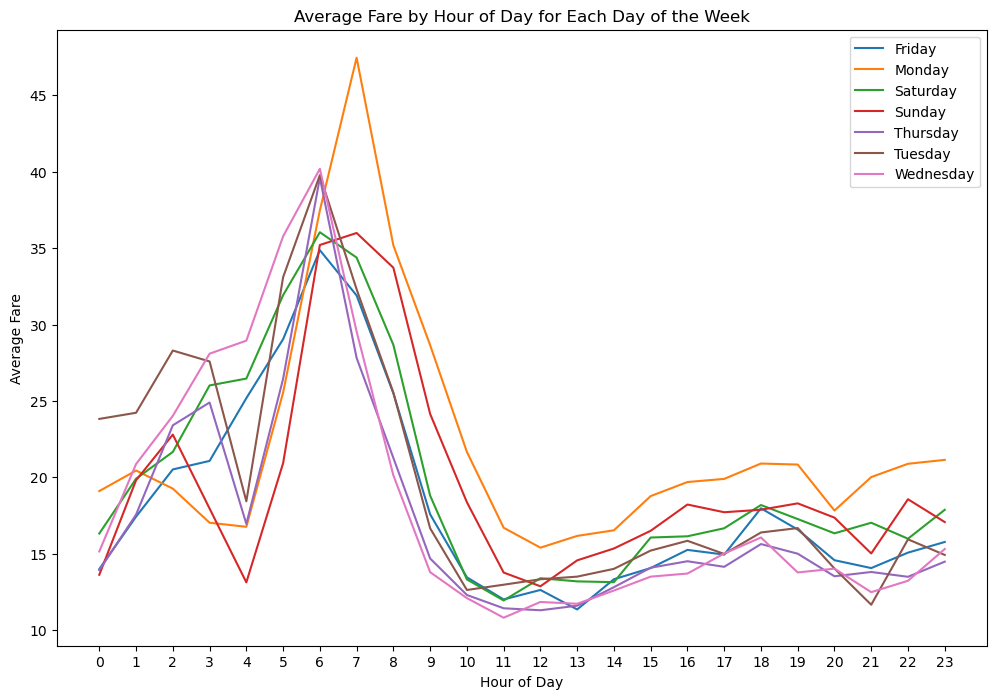

In [118]:


# Group by day of week and hour of day, and compute the average fare
fare_ts = df_yt1.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                         hour("tpep_pickup_datetime").alias("hour_of_day")) \
                .agg(avg("fare_amount").alias("avg_fare"))

# Convert day of week to string representation
fare_ts = fare_ts.withColumn("day_of_week", 
                             when(col("day_of_week") == 1, "Monday") \
                             .when(col("day_of_week") == 2, "Tuesday") \
                             .when(col("day_of_week") == 3, "Wednesday") \
                             .when(col("day_of_week") == 4, "Thursday") \
                             .when(col("day_of_week") == 5, "Friday") \
                             .when(col("day_of_week") == 6, "Saturday") \
                             .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
fare_ts = fare_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
fare_ts_pd = fare_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in fare_ts_pd['day_of_week'].unique():
    subset = fare_ts_pd[fare_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['avg_fare'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of Day for Each Day of the Week janury 2019')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

# 3-The average trip duration

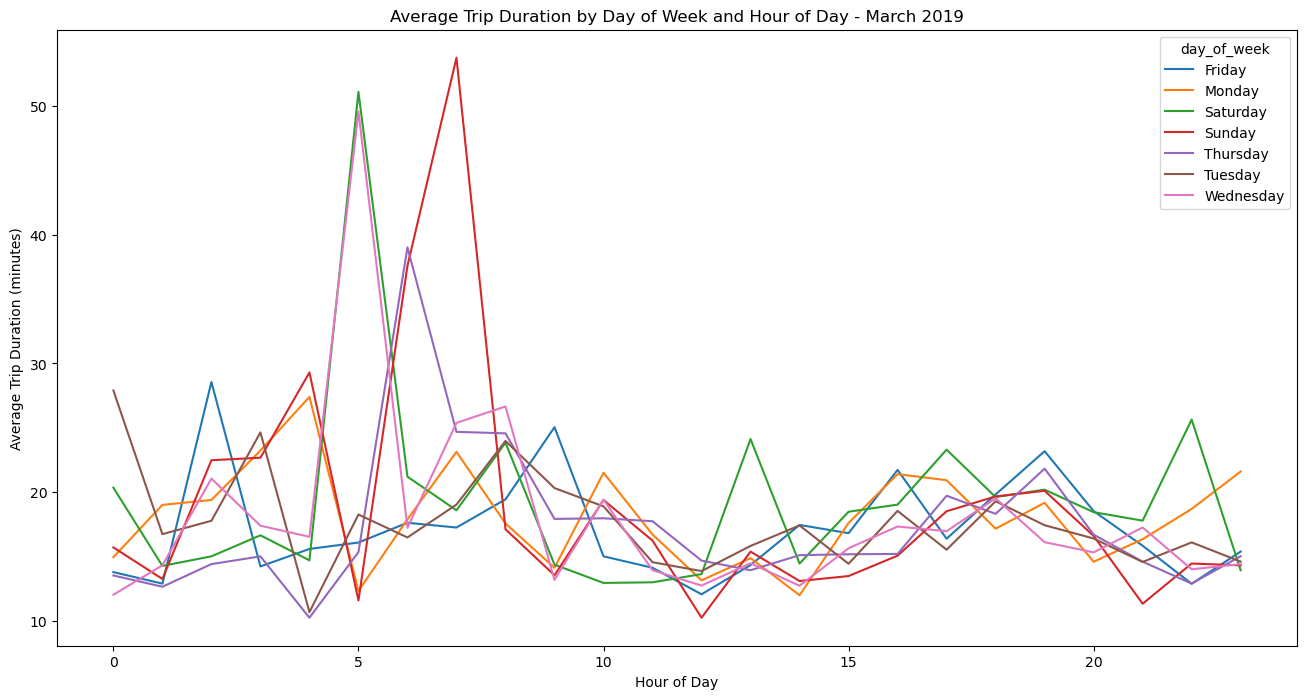

In [120]:


# Convert pickup and dropoff timestamps to Unix time and calculate trip duration
df_yt3 = df_yt1.withColumn("pickup_time", unix_timestamp("tpep_pickup_datetime")) \
               .withColumn("dropoff_time", unix_timestamp("tpep_dropoff_datetime")) \
               .withColumn("trip_duration", (col("dropoff_time") - col("pickup_time")) / 60)

# Compute average trip duration by day of week and hour of day
trip_duration_day_of_week = df_yt3.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"), 
                                           hour("tpep_pickup_datetime").alias("hour_of_day")) \
                                   .agg(avg("trip_duration").alias("avg_duration"))

# Convert day of week to string representation
trip_duration_day_of_week = trip_duration_day_of_week.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
trip_duration_day_of_week = trip_duration_day_of_week.orderBy("day_of_week", "hour_of_day")

# Convert the data to a Pandas dataframe for plotting
trip_duration_day_of_week_pd = trip_duration_day_of_week.toPandas()

# Plot the time series
plt.figure(figsize=(16, 8))
sns.lineplot(data=trip_duration_day_of_week_pd, x="hour_of_day", y="avg_duration", hue="day_of_week", palette="tab10")
plt.title("Average Trip Duration by Day of Week and Hour of Day -janury 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()

# the average of ongoing trips

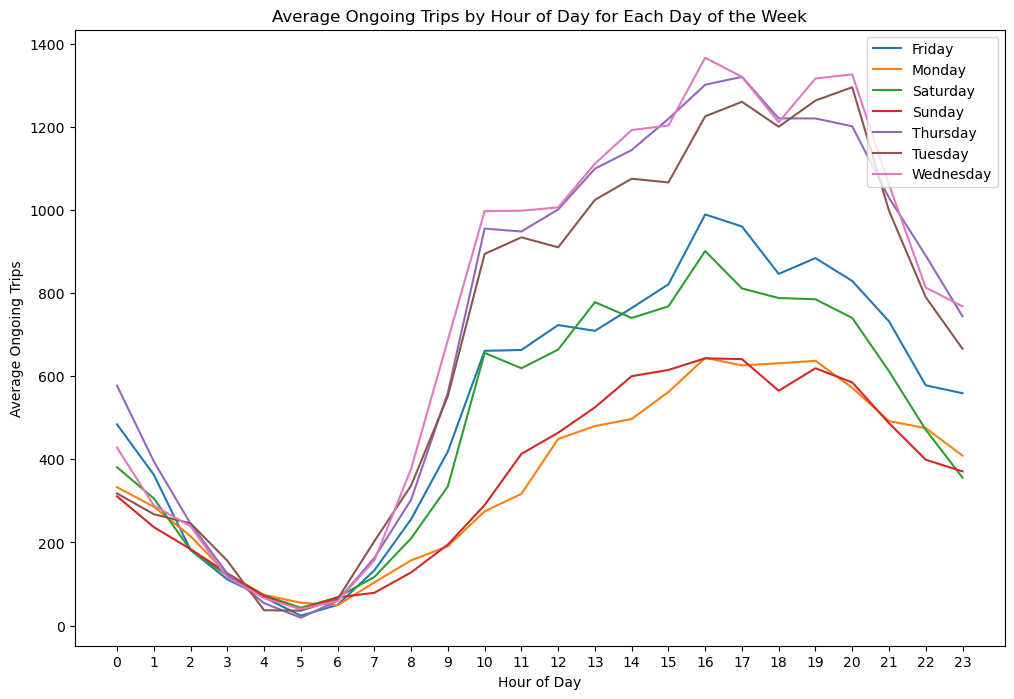

In [134]:

# Group by day of week and hour of day, and compute the count of pickups
ongoing_trips_ts = df_yt1.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                                  hour("tpep_pickup_datetime").alias("hour_of_day")) \
                         .count()

# Convert day of week to string representation
ongoing_trips_ts = ongoing_trips_ts.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
ongoing_trips_ts = ongoing_trips_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in ongoing_trips_ts_pd['day_of_week'].unique():
    subset = ongoing_trips_ts_pd[ongoing_trips_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['count'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Ongoing Trips')
plt.title('Average Ongoing Trips by Hour of Day for Each Day of the Week janury 2019')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

# mounth janury 2020 yellow taxi

# Number of Pickups by Day of Week and Hour of Day 

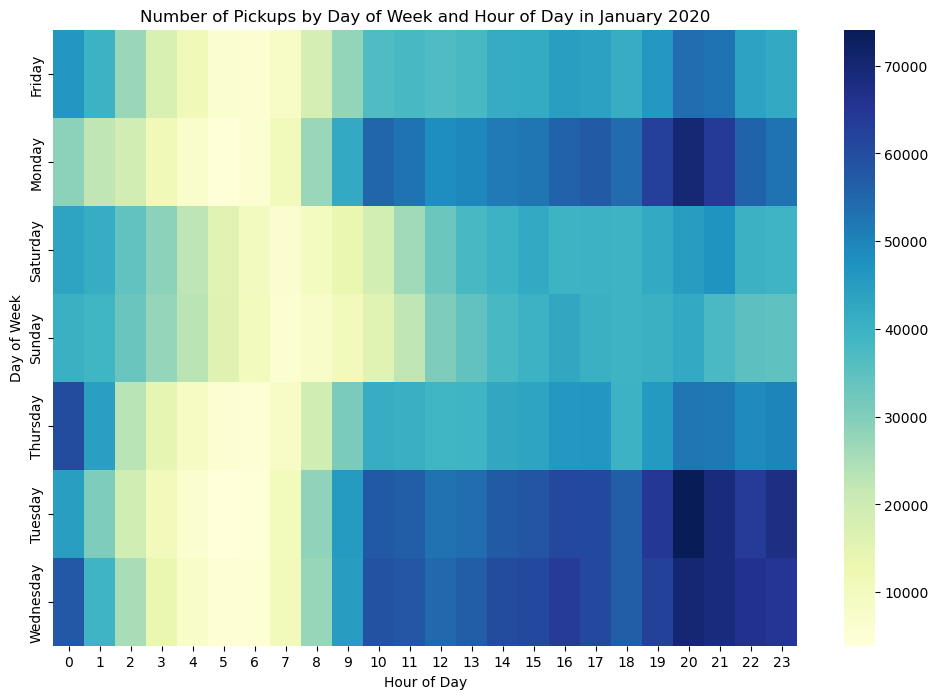

In [109]:


# Group by day of week and hour of day, and count the number of pickups
pickup_ts = df_yt13.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                        hour("tpep_pickup_datetime").alias("hour_of_day")) \
              .count()

# Convert day of week to string representation
pickup_ts = pickup_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Sunday") \
                                 .when(col("day_of_week") == 2, "Monday") \
                                 .when(col("day_of_week") == 3, "Tuesday") \
                                 .when(col("day_of_week") == 4, "Wednesday") \
                                 .when(col("day_of_week") == 5, "Thursday") \
                                 .when(col("day_of_week") == 6, "Friday") \
                                 .when(col("day_of_week") == 7, "Saturday"))

# Sort the data by day of week and hour of day
pickup_ts = pickup_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_pd = pickup_ts.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_pivot = pickup_ts_pd.pivot(index="day_of_week", 
                                     columns="hour_of_day", 
                                     values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day in January 2020")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# 2. The average fare by Day of Week and Hour of Day

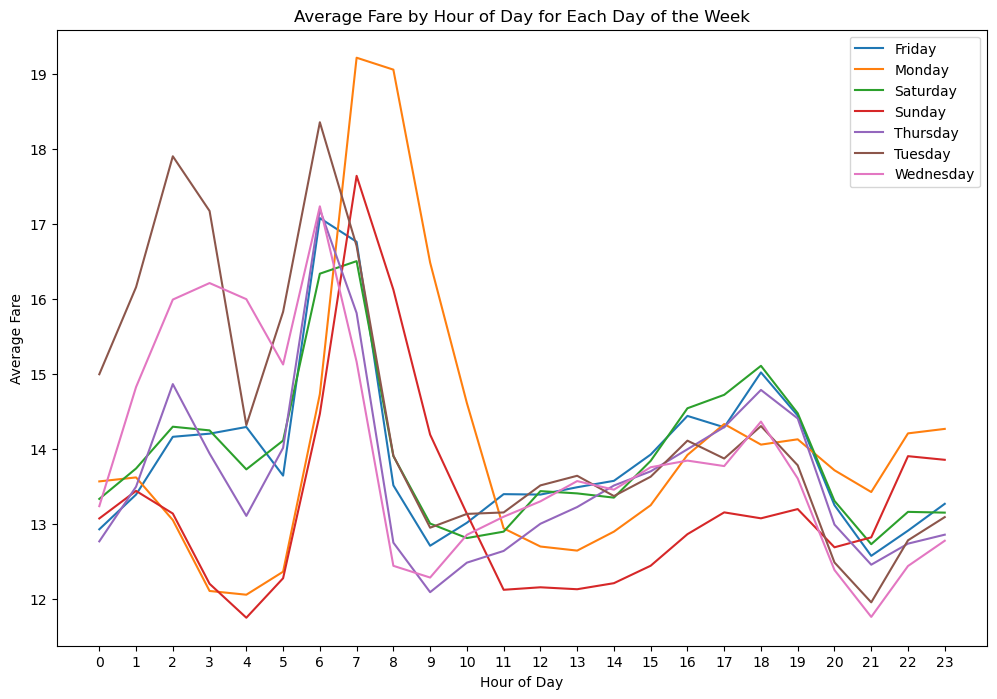

In [121]:


# Group by day of week and hour of day, and compute the average fare
fare_ts = df_yt13.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                         hour("tpep_pickup_datetime").alias("hour_of_day")) \
                .agg(avg("fare_amount").alias("avg_fare"))

# Convert day of week to string representation
fare_ts = fare_ts.withColumn("day_of_week", 
                             when(col("day_of_week") == 1, "Monday") \
                             .when(col("day_of_week") == 2, "Tuesday") \
                             .when(col("day_of_week") == 3, "Wednesday") \
                             .when(col("day_of_week") == 4, "Thursday") \
                             .when(col("day_of_week") == 5, "Friday") \
                             .when(col("day_of_week") == 6, "Saturday") \
                             .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
fare_ts = fare_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
fare_ts_pd = fare_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in fare_ts_pd['day_of_week'].unique():
    subset = fare_ts_pd[fare_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['avg_fare'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of Day for Each Day of the Week janury 2020')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

# 3-The average trip duration

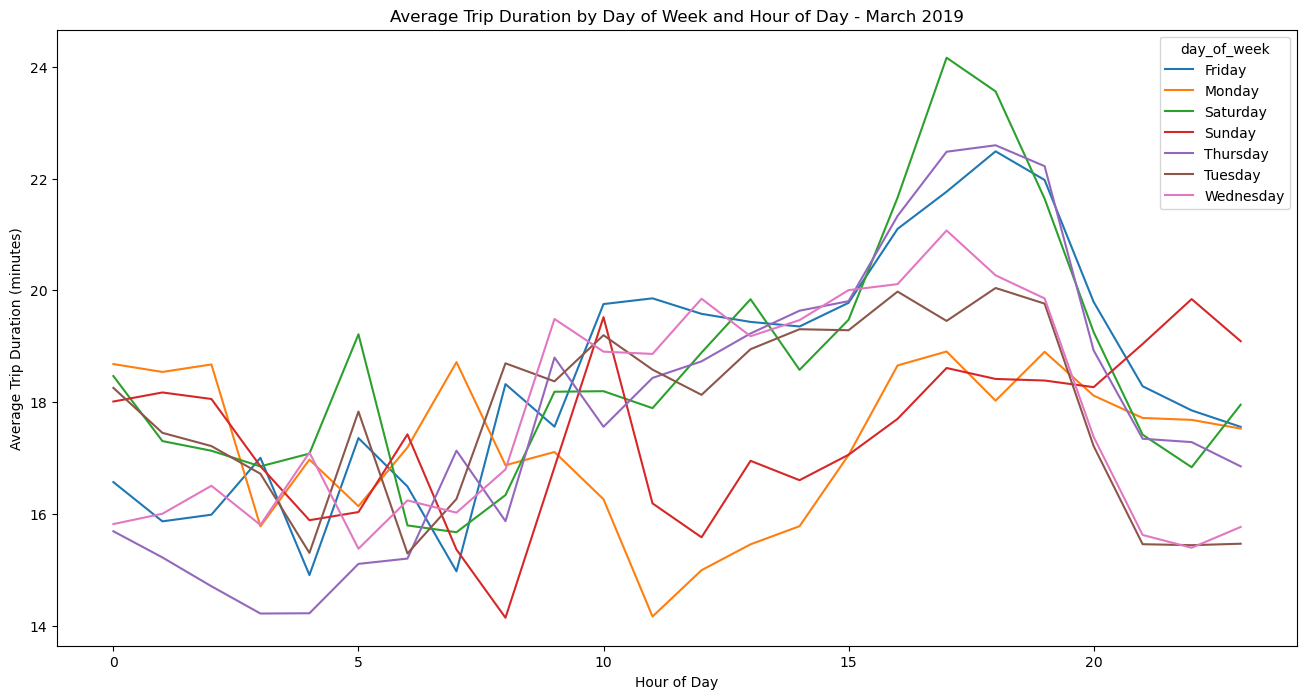

In [122]:


# Convert pickup and dropoff timestamps to Unix time and calculate trip duration
df_yt3 = df_yt13.withColumn("pickup_time", unix_timestamp("tpep_pickup_datetime")) \
               .withColumn("dropoff_time", unix_timestamp("tpep_dropoff_datetime")) \
               .withColumn("trip_duration", (col("dropoff_time") - col("pickup_time")) / 60)

# Compute average trip duration by day of week and hour of day
trip_duration_day_of_week = df_yt3.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"), 
                                           hour("tpep_pickup_datetime").alias("hour_of_day")) \
                                   .agg(avg("trip_duration").alias("avg_duration"))

# Convert day of week to string representation
trip_duration_day_of_week = trip_duration_day_of_week.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
trip_duration_day_of_week = trip_duration_day_of_week.orderBy("day_of_week", "hour_of_day")

# Convert the data to a Pandas dataframe for plotting
trip_duration_day_of_week_pd = trip_duration_day_of_week.toPandas()

# Plot the time series
plt.figure(figsize=(16, 8))
sns.lineplot(data=trip_duration_day_of_week_pd, x="hour_of_day", y="avg_duration", hue="day_of_week", palette="tab10")
plt.title("Average Trip Duration by Day of Week and Hour of Day - janury 2020")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()

# 4-the average of ongoing trips

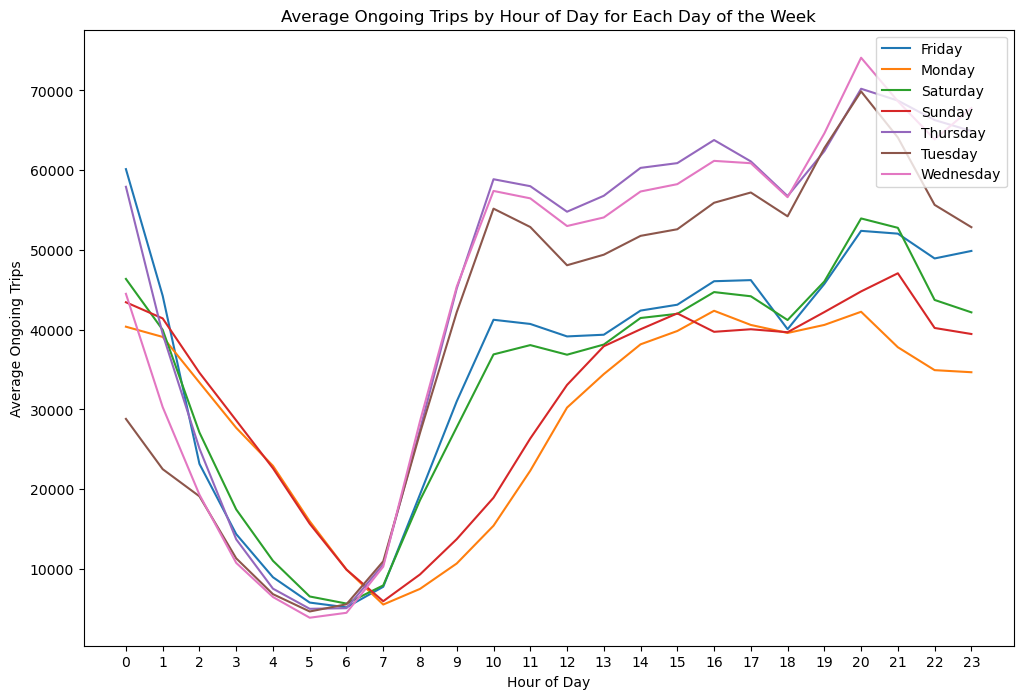

In [133]:


# Group by day of week and hour of day, and compute the count of pickups
ongoing_trips_ts = df_yt13.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                                  hour("tpep_pickup_datetime").alias("hour_of_day")) \
                         .count()

# Convert day of week to string representation
ongoing_trips_ts = ongoing_trips_ts.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
ongoing_trips_ts = ongoing_trips_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in ongoing_trips_ts_pd['day_of_week'].unique():
    subset = ongoing_trips_ts_pd[ongoing_trips_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['count'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Ongoing Trips')
plt.title('Average Ongoing Trips by Hour of Day for Each Day of the Week janury 2020')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

# mounth janury 2021

# 1-Number of Pickups by Day of Week and Hour of Day

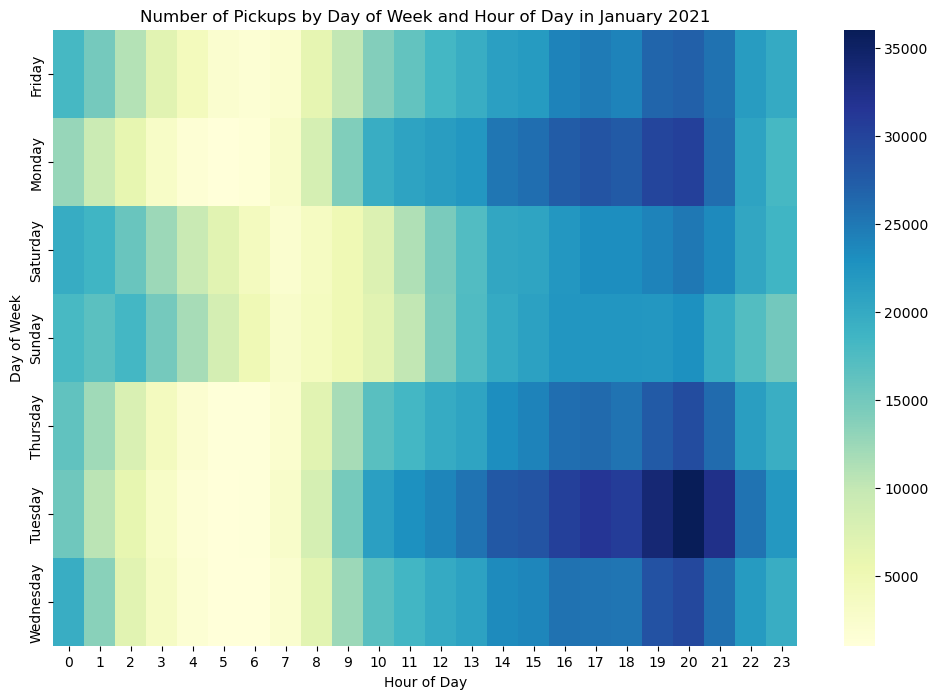

In [110]:

# Group by day of week and hour of day, and count the number of pickups
pickup_ts = df_yt14.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                        hour("tpep_pickup_datetime").alias("hour_of_day")) \
              .count()

# Convert day of week to string representation
pickup_ts = pickup_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Sunday") \
                                 .when(col("day_of_week") == 2, "Monday") \
                                 .when(col("day_of_week") == 3, "Tuesday") \
                                 .when(col("day_of_week") == 4, "Wednesday") \
                                 .when(col("day_of_week") == 5, "Thursday") \
                                 .when(col("day_of_week") == 6, "Friday") \
                                 .when(col("day_of_week") == 7, "Saturday"))

# Sort the data by day of week and hour of day
pickup_ts = pickup_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_pd = pickup_ts.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_pivot = pickup_ts_pd.pivot(index="day_of_week", 
                                     columns="hour_of_day", 
                                     values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day in January 2021")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# 2. The average fare by Day of Week and Hour of Day

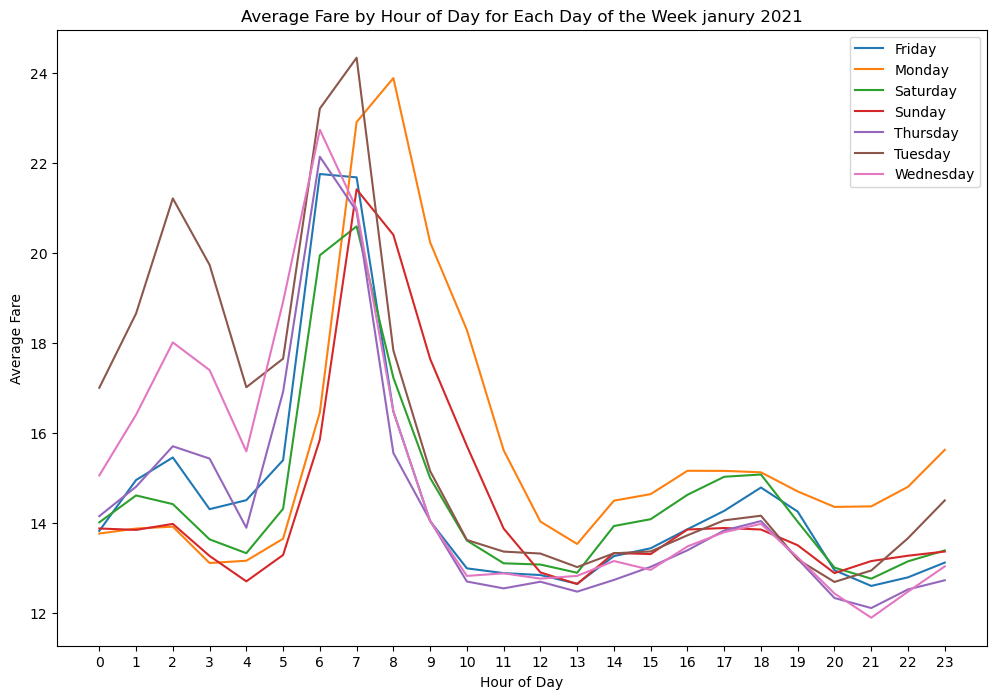

In [138]:


# Group by day of week and hour of day, and compute the average fare
fare_ts = df_yt14.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                         hour("tpep_pickup_datetime").alias("hour_of_day")) \
                .agg(avg("fare_amount").alias("avg_fare"))

# Convert day of week to string representation
fare_ts = fare_ts.withColumn("day_of_week", 
                             when(col("day_of_week") == 1, "Monday") \
                             .when(col("day_of_week") == 2, "Tuesday") \
                             .when(col("day_of_week") == 3, "Wednesday") \
                             .when(col("day_of_week") == 4, "Thursday") \
                             .when(col("day_of_week") == 5, "Friday") \
                             .when(col("day_of_week") == 6, "Saturday") \
                             .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
fare_ts = fare_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
fare_ts_pd = fare_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in fare_ts_pd['day_of_week'].unique():
    subset = fare_ts_pd[fare_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['avg_fare'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of Day for Each Day of the Week janury 2021')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

# 3-The average trip duration

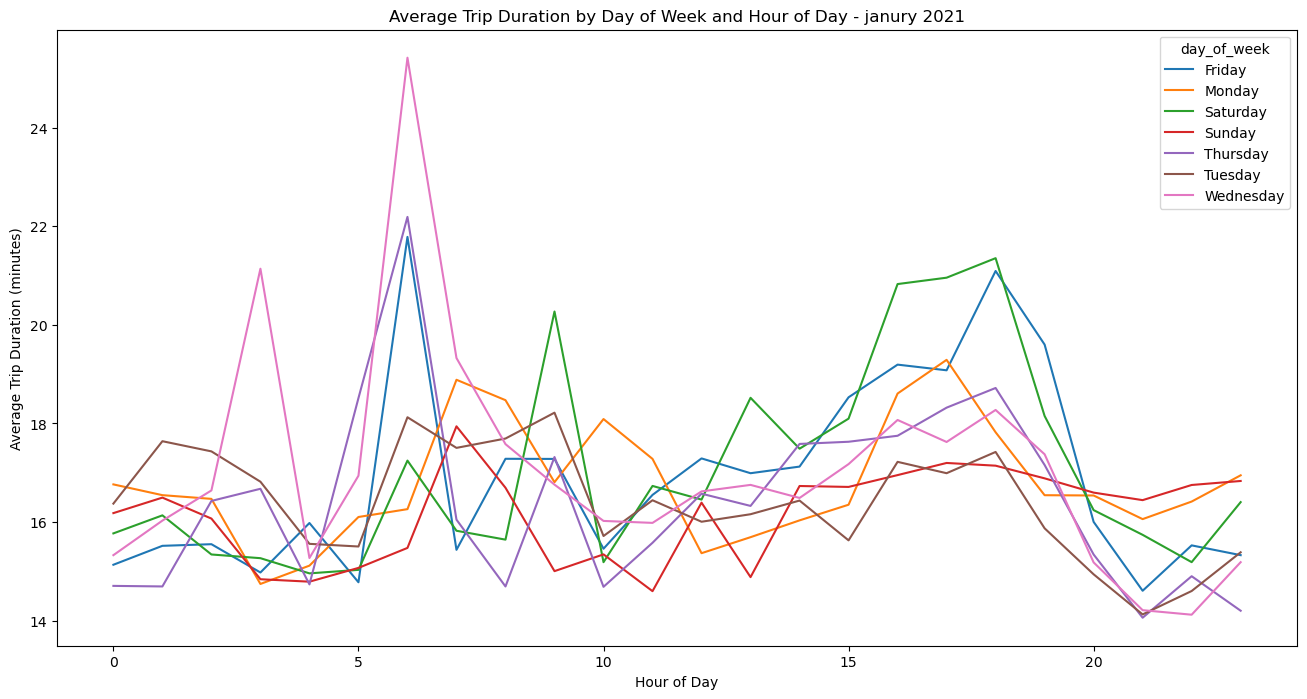

In [137]:


# Convert pickup and dropoff timestamps to Unix time and calculate trip duration
df_yt3 = df_yt14.withColumn("pickup_time", unix_timestamp("tpep_pickup_datetime")) \
               .withColumn("dropoff_time", unix_timestamp("tpep_dropoff_datetime")) \
               .withColumn("trip_duration", (col("dropoff_time") - col("pickup_time")) / 60)

# Compute average trip duration by day of week and hour of day
trip_duration_day_of_week = df_yt3.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"), 
                                           hour("tpep_pickup_datetime").alias("hour_of_day")) \
                                   .agg(avg("trip_duration").alias("avg_duration"))

# Convert day of week to string representation
trip_duration_day_of_week = trip_duration_day_of_week.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
trip_duration_day_of_week = trip_duration_day_of_week.orderBy("day_of_week", "hour_of_day")

# Convert the data to a Pandas dataframe for plotting
trip_duration_day_of_week_pd = trip_duration_day_of_week.toPandas()

# Plot the time series
plt.figure(figsize=(16, 8))
sns.lineplot(data=trip_duration_day_of_week_pd, x="hour_of_day", y="avg_duration", hue="day_of_week", palette="tab10")
plt.title("Average Trip Duration by Day of Week and Hour of Day - janury 2021")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()

# 4-the average of ongoing trips

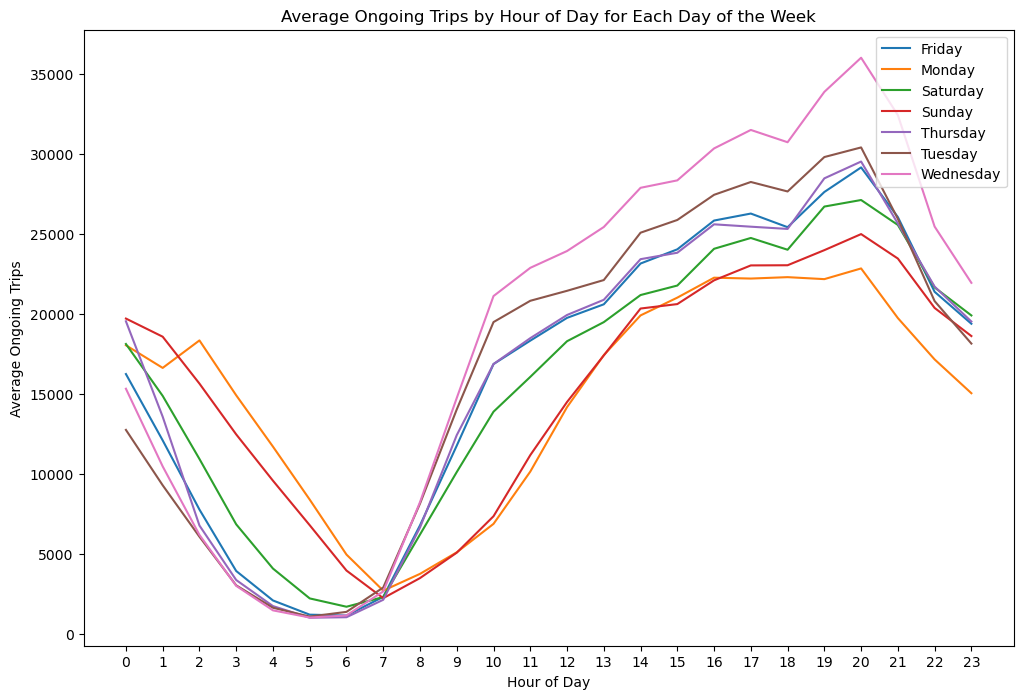

In [132]:


# Group by day of week and hour of day, and compute the count of pickups
ongoing_trips_ts = df_yt14.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                                  hour("tpep_pickup_datetime").alias("hour_of_day")) \
                         .count()

# Convert day of week to string representation
ongoing_trips_ts = ongoing_trips_ts.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
ongoing_trips_ts = ongoing_trips_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in ongoing_trips_ts_pd['day_of_week'].unique():
    subset = ongoing_trips_ts_pd[ongoing_trips_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['count'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Ongoing Trips')
plt.title('Average Ongoing Trips by Hour of Day for Each Day of the Week janury 2021')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

#  mounth janury 2022 

# 1-Number of Pickups by Day of Week and Hour of Day

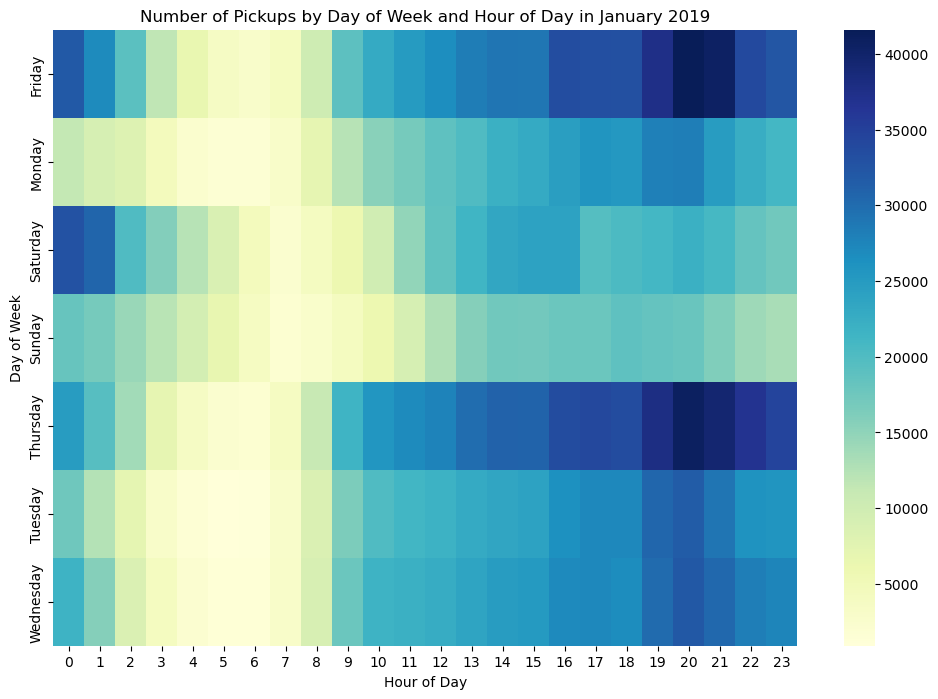

In [108]:


# Group by day of week and hour of day, and count the number of pickups
pickup_ts = df_yt15.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                        hour("tpep_pickup_datetime").alias("hour_of_day")) \
              .count()

# Convert day of week to string representation
pickup_ts = pickup_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Sunday") \
                                 .when(col("day_of_week") == 2, "Monday") \
                                 .when(col("day_of_week") == 3, "Tuesday") \
                                 .when(col("day_of_week") == 4, "Wednesday") \
                                 .when(col("day_of_week") == 5, "Thursday") \
                                 .when(col("day_of_week") == 6, "Friday") \
                                 .when(col("day_of_week") == 7, "Saturday"))

# Sort the data by day of week and hour of day
pickup_ts = pickup_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_pd = pickup_ts.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_pivot = pickup_ts_pd.pivot(index="day_of_week", 
                                     columns="hour_of_day", 
                                     values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day in January 2022")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# 2. The average fare by Day of Week and Hour of Day

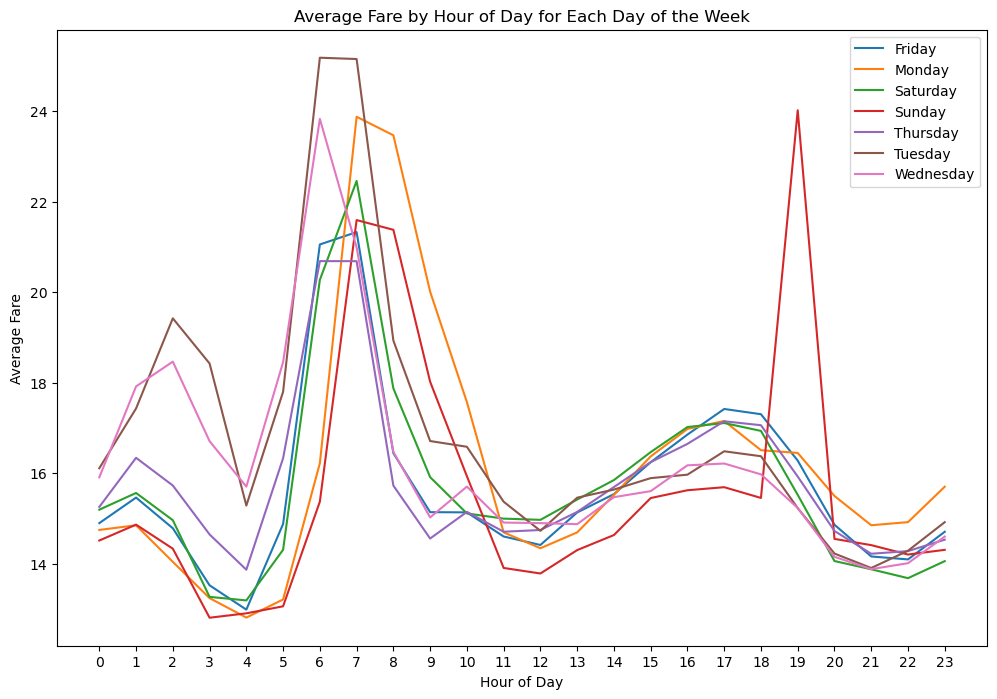

In [126]:

# Group by day of week and hour of day, and compute the average fare
fare_ts = df_yt15.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                         hour("tpep_pickup_datetime").alias("hour_of_day")) \
                .agg(avg("fare_amount").alias("avg_fare"))

# Convert day of week to string representation
fare_ts = fare_ts.withColumn("day_of_week", 
                             when(col("day_of_week") == 1, "Monday") \
                             .when(col("day_of_week") == 2, "Tuesday") \
                             .when(col("day_of_week") == 3, "Wednesday") \
                             .when(col("day_of_week") == 4, "Thursday") \
                             .when(col("day_of_week") == 5, "Friday") \
                             .when(col("day_of_week") == 6, "Saturday") \
                             .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
fare_ts = fare_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
fare_ts_pd = fare_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in fare_ts_pd['day_of_week'].unique():
    subset = fare_ts_pd[fare_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['avg_fare'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of Day for Each Day of the Week janvier 2022')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

# 3-The average trip duration

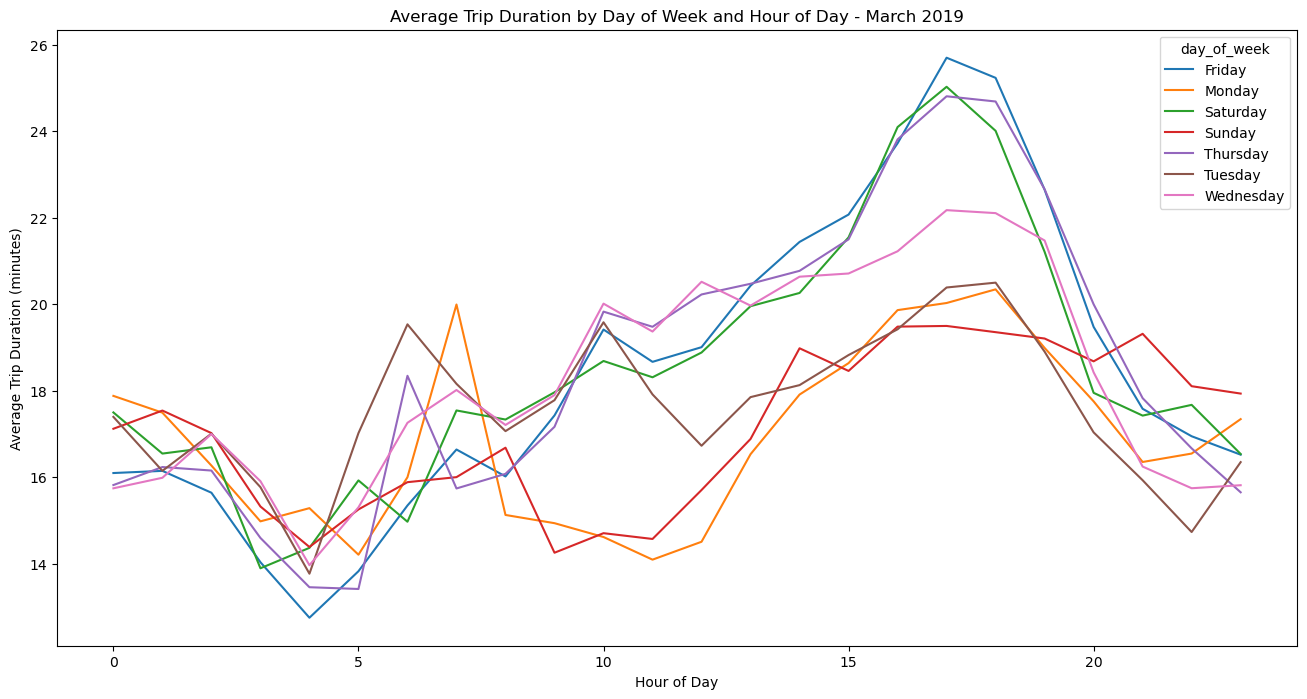

In [125]:


# Convert pickup and dropoff timestamps to Unix time and calculate trip duration
df_yt3 = df_yt15.withColumn("pickup_time", unix_timestamp("tpep_pickup_datetime")) \
               .withColumn("dropoff_time", unix_timestamp("tpep_dropoff_datetime")) \
               .withColumn("trip_duration", (col("dropoff_time") - col("pickup_time")) / 60)

# Compute average trip duration by day of week and hour of day
trip_duration_day_of_week = df_yt3.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"), 
                                           hour("tpep_pickup_datetime").alias("hour_of_day")) \
                                   .agg(avg("trip_duration").alias("avg_duration"))

# Convert day of week to string representation
trip_duration_day_of_week = trip_duration_day_of_week.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
trip_duration_day_of_week = trip_duration_day_of_week.orderBy("day_of_week", "hour_of_day")

# Convert the data to a Pandas dataframe for plotting
trip_duration_day_of_week_pd = trip_duration_day_of_week.toPandas()

# Plot the time series
plt.figure(figsize=(16, 8))
sns.lineplot(data=trip_duration_day_of_week_pd, x="hour_of_day", y="avg_duration", hue="day_of_week", palette="tab10")
plt.title("Average Trip Duration by Day of Week and Hour of Day - janvier 2022")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()

# 4-the average of ongoing trips

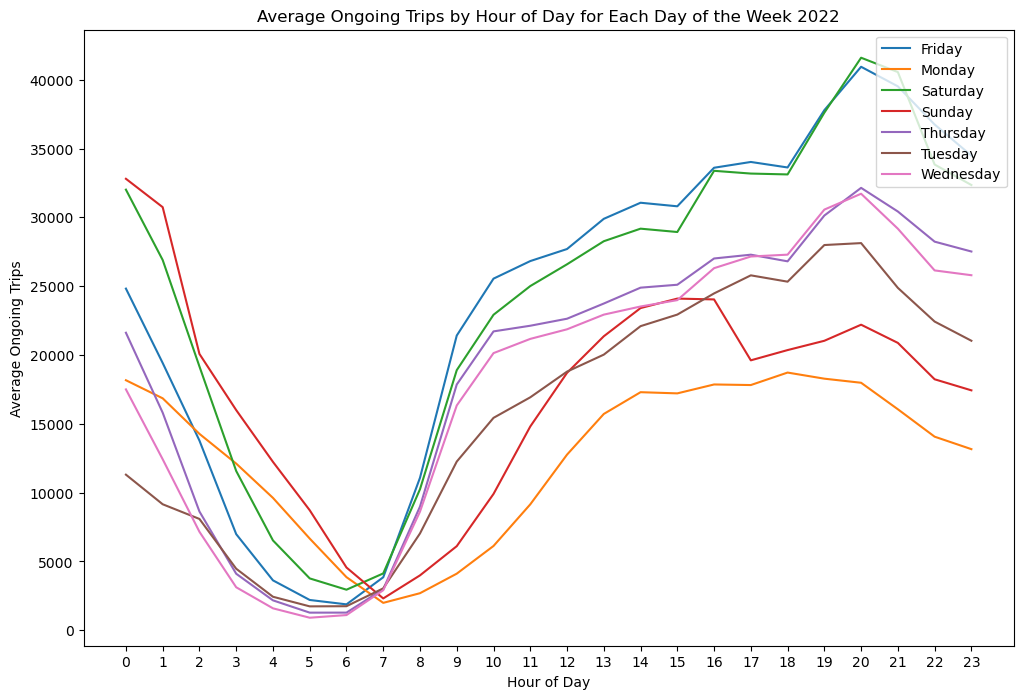

In [136]:

# Group by day of week and hour of day, and compute the count of pickups
ongoing_trips_ts = df_yt15.groupBy(dayofweek("tpep_pickup_datetime").alias("day_of_week"),
                                  hour("tpep_pickup_datetime").alias("hour_of_day")) \
                         .count()

# Convert day of week to string representation
ongoing_trips_ts = ongoing_trips_ts.withColumn("day_of_week", 
                                               when(col("day_of_week") == 1, "Monday") \
                                               .when(col("day_of_week") == 2, "Tuesday") \
                                               .when(col("day_of_week") == 3, "Wednesday") \
                                               .when(col("day_of_week") == 4, "Thursday") \
                                               .when(col("day_of_week") == 5, "Friday") \
                                               .when(col("day_of_week") == 6, "Saturday") \
                                               .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
ongoing_trips_ts = ongoing_trips_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Plot each day as a separate line on the same plot
plt.figure(figsize=(12,8))
for day in ongoing_trips_ts_pd['day_of_week'].unique():
    subset = ongoing_trips_ts_pd[ongoing_trips_ts_pd['day_of_week'] == day]
    if not subset.empty:
        plt.plot(subset['hour_of_day'], subset['count'], label = day)

plt.xlabel('Hour of Day')
plt.ylabel('Average Ongoing Trips')
plt.title('Average Ongoing Trips by Hour of Day for Each Day of the Week 2022')
plt.xticks(np.arange(0, 24, step=1))  # Set x-axis ticks for each hour
plt.legend(loc='upper right')
plt.show()

#  mounth janury 2019 FHV

# 1-Number of Pickups by Day of Week and Hour of Day

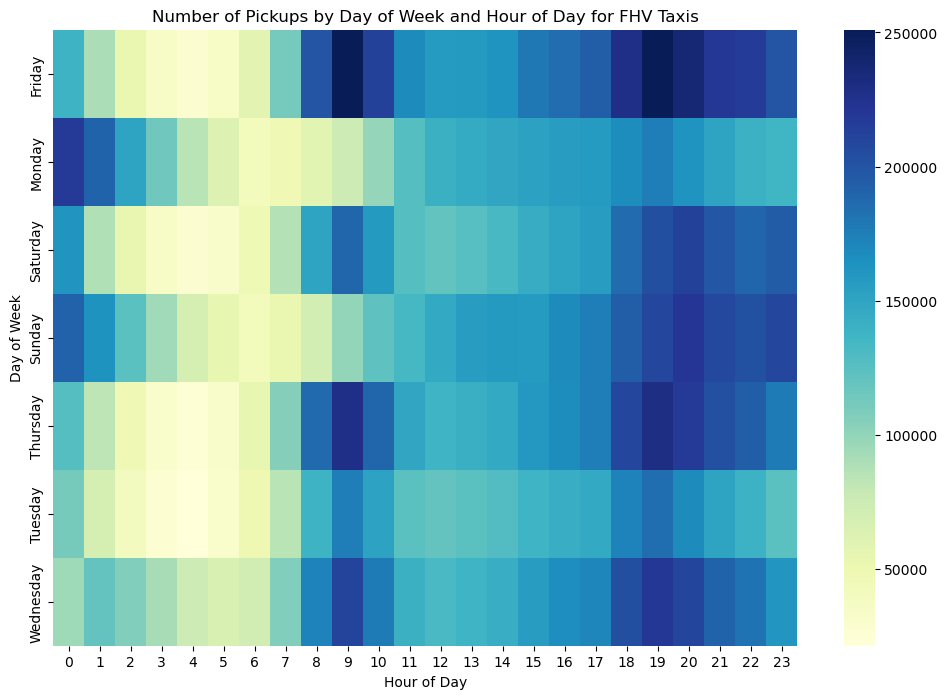

In [113]:



# Group by day of week and hour of day, and count the number of pickups
pickup_ts_fhv = df_thv1.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                               hour("pickup_datetime").alias("hour_of_day")) \
                      .count()

# Convert day of week to string representation
pickup_ts_fhv = pickup_ts_fhv.withColumn("day_of_week", 
                                         when(col("day_of_week") == 1, "Monday") \
                                         .when(col("day_of_week") == 2, "Tuesday") \
                                         .when(col("day_of_week") == 3, "Wednesday") \
                                         .when(col("day_of_week") == 4, "Thursday") \
                                         .when(col("day_of_week") == 5, "Friday") \
                                         .when(col("day_of_week") == 6, "Saturday") \
                                         .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
pickup_ts_fhv = pickup_ts_fhv.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_fhv_pd = pickup_ts_fhv.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_fhv_pivot = pickup_ts_fhv_pd.pivot(index="day_of_week", 
                                             columns="hour_of_day", 
                                             values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_fhv_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day for FHV Taxis 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# 2. The average fare by Day of Week and Hour of Day

# 3-The average trip duration

In [ ]:

# Calculer la durée du trajet en minutes
df_fhv = df_thv1.withColumn("trip_duration", (unix_timestamp(col("dropOff_datetime")) - unix_timestamp(col("pickup_datetime")))/60)

# Grouper par jour de la semaine et heure de la journée
trip_duration_ts = df_fhv.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                                  hour("pickup_datetime").alias("hour_of_day")) \
                         .agg(avg("trip_duration").alias("average_trip_duration"))

# Convertir le jour de la semaine en représentation textuelle
trip_duration_ts = trip_duration_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Monday") \
                                 .when(col("day_of_week") == 2, "Tuesday") \
                                 .when(col("day_of_week") == 3, "Wednesday") \
                                 .when(col("day_of_week") == 4, "Thursday") \
                                 .when(col("day_of_week") == 5, "Friday") \
                                 .when(col("day_of_week") == 6, "Saturday") \
                                 .when(col("day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
trip_duration_ts = trip_duration_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
trip_duration_ts_pd = trip_duration_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
trip_duration_ts_pivot = trip_duration_ts_pd.pivot(index="day_of_week", 
                                                   columns="hour_of_day", 
                                                   values="average_trip_duration")


# Plot the heatmap
plt.figure(figsize=(15, 10)) # Increase figure size for better visibility
heatmap = sns.heatmap(trip_duration_ts_pivot, cmap='coolwarm', annot=True, fmt=".1f") # Use a different color scheme, add annotations and format them

plt.title('Average Trip Duration by Day of Week and Hour of Day 2019', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(np.arange(0.5, len(median_duration_ts_pivot.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Change y-ticks to days of the week
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modify colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Average Trip Duration  (minutes)')

plt.show()

23/05/24 16:07:50 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 1 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:214)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecuto

23/05/24 16:09:55 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 2 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:214)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecuto

23/05/24 16:12:00 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 3 retries)
java.io.IOException: Connecting to /172.20.10.8:37985 timed out (120000 ms)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:285)
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:218)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:126)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:154)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:184)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:515)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:264)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExe

# 4-the average of ongoing trips

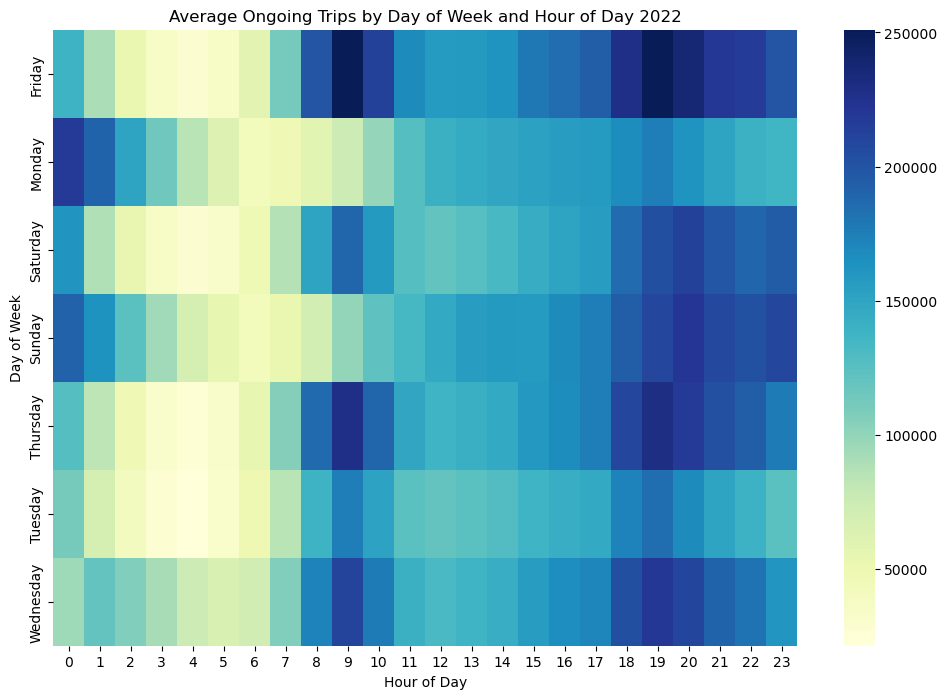

In [152]:
# Filtrer les trajets qui ont une heure de début et de fin
df_fhv = df_thv1.filter(col("pickup_datetime").isNotNull() & col("dropOff_datetime").isNotNull())

# Créer un DataFrame avec une ligne pour chaque heure où un trajet est en cours
ongoing_trips = df_fhv.select(dayofweek("pickup_datetime").alias("pickup_day_of_week"),
                              hour("pickup_datetime").alias("pickup_hour_of_day"),
                              dayofweek("dropOff_datetime").alias("dropOff_day_of_week"),
                              hour("dropOff_datetime").alias("dropOff_hour_of_day"))

# Calculer le nombre de trajets en cours pour chaque heure de chaque jour de la semaine
ongoing_trips_ts = ongoing_trips.groupBy("pickup_day_of_week", "pickup_hour_of_day") \
                                .agg(count("*").alias("average_ongoing_trips"))

# Convertir le jour de la semaine en représentation textuelle
ongoing_trips_ts = ongoing_trips_ts.withColumn("pickup_day_of_week", 
                                 when(col("pickup_day_of_week") == 1, "Monday") \
                                 .when(col("pickup_day_of_week") == 2, "Tuesday") \
                                 .when(col("pickup_day_of_week") == 3, "Wednesday") \
                                 .when(col("pickup_day_of_week") == 4, "Thursday") \
                                 .when(col("pickup_day_of_week") == 5, "Friday") \
                                 .when(col("pickup_day_of_week") == 6, "Saturday") \
                                 .when(col("pickup_day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
ongoing_trips_ts = ongoing_trips_ts.sort(col("pickup_day_of_week"), col("pickup_hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
ongoing_trips_ts_pivot = ongoing_trips_ts_pd.pivot(index="pickup_day_of_week", 
                                                   columns="pickup_hour_of_day", 
                                                   values="average_ongoing_trips")

# Créer un heatmap des données
plt.figure(figsize=(12, 8))
sns.heatmap(ongoing_trips_ts_pivot, cmap="YlGnBu")
plt.title("Average Ongoing Trips by Day of Week and Hour of Day 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# Number of Pickups by Day of Week and Hour of Day mounth janury 2020 FHV

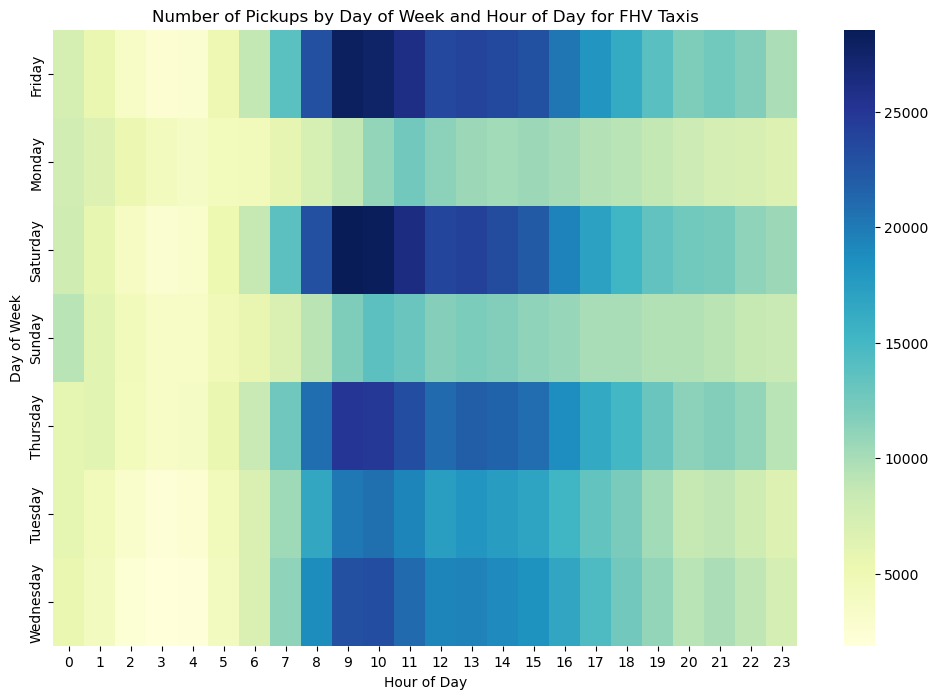

In [199]:



# Group by day of week and hour of day, and count the number of pickups
pickup_ts_fhv = df_thv2.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                               hour("pickup_datetime").alias("hour_of_day")) \
                      .count()

# Convert day of week to string representation
pickup_ts_fhv = pickup_ts_fhv.withColumn("day_of_week", 
                                         when(col("day_of_week") == 1, "Monday") \
                                         .when(col("day_of_week") == 2, "Tuesday") \
                                         .when(col("day_of_week") == 3, "Wednesday") \
                                         .when(col("day_of_week") == 4, "Thursday") \
                                         .when(col("day_of_week") == 5, "Friday") \
                                         .when(col("day_of_week") == 6, "Saturday") \
                                         .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
pickup_ts_fhv = pickup_ts_fhv.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_fhv_pd = pickup_ts_fhv.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_fhv_pivot = pickup_ts_fhv_pd.pivot(index="day_of_week", 
                                             columns="hour_of_day", 
                                             values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_fhv_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day for FHV Taxis")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()



# 2. The average fare by Day of Week and Hour of Day

# 3-The average trip duration

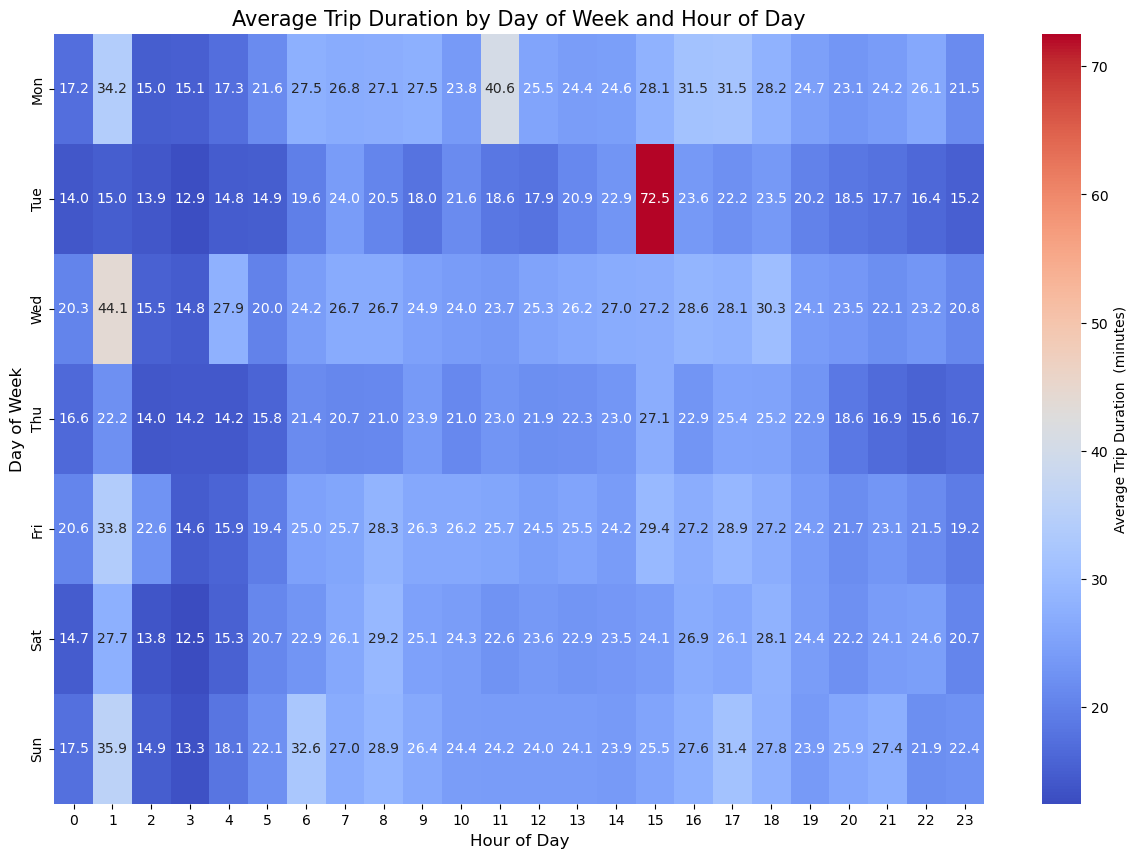

In [197]:


# Calculer la durée du trajet en minutes
df_fhv = df_thv2.withColumn("trip_duration", (unix_timestamp(col("dropOff_datetime")) - unix_timestamp(col("pickup_datetime")))/60)

# Grouper par jour de la semaine et heure de la journée
trip_duration_ts = df_fhv.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                                  hour("pickup_datetime").alias("hour_of_day")) \
                         .agg(avg("trip_duration").alias("average_trip_duration"))

# Convertir le jour de la semaine en représentation textuelle
trip_duration_ts = trip_duration_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Monday") \
                                 .when(col("day_of_week") == 2, "Tuesday") \
                                 .when(col("day_of_week") == 3, "Wednesday") \
                                 .when(col("day_of_week") == 4, "Thursday") \
                                 .when(col("day_of_week") == 5, "Friday") \
                                 .when(col("day_of_week") == 6, "Saturday") \
                                 .when(col("day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
trip_duration_ts = trip_duration_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
trip_duration_ts_pd = trip_duration_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
trip_duration_ts_pivot = trip_duration_ts_pd.pivot(index="day_of_week", 
                                                   columns="hour_of_day", 
                                                   values="average_trip_duration")


# Plot the heatmap
plt.figure(figsize=(15, 10)) # Increase figure size for better visibility
heatmap = sns.heatmap(trip_duration_ts_pivot, cmap='coolwarm', annot=True, fmt=".1f") # Use a different color scheme, add annotations and format them

plt.title('Average Trip Duration by Day of Week and Hour of Day', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(np.arange(0.5, len(median_duration_ts_pivot.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Change y-ticks to days of the week
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modify colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Average Trip Duration  (minutes)')

plt.show()

# 4-the average of ongoing trips

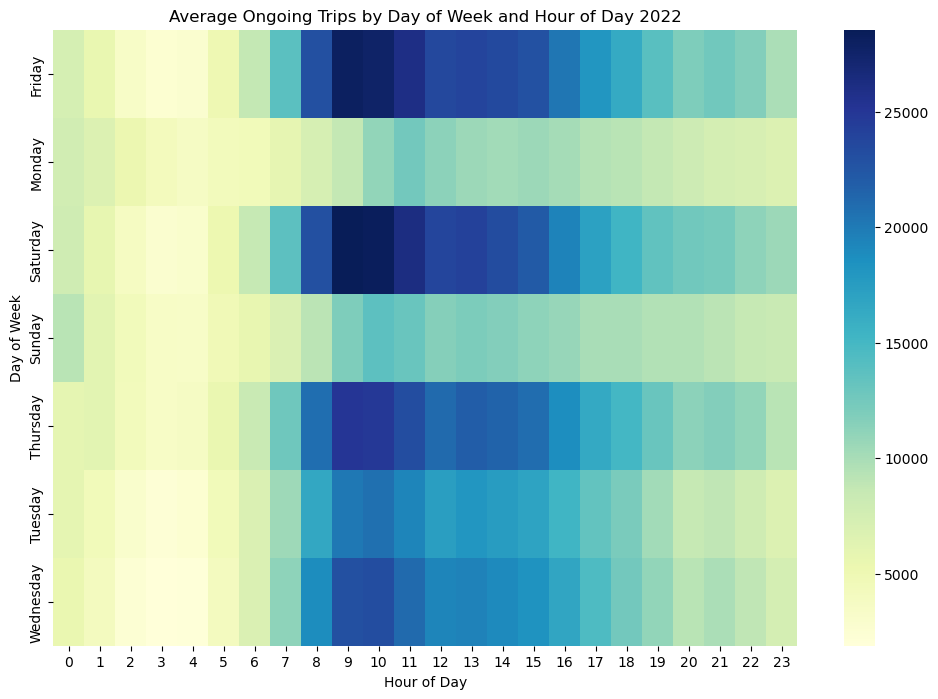

In [151]:
# Filtrer les trajets qui ont une heure de début et de fin
df_fhv = df_thv2.filter(col("pickup_datetime").isNotNull() & col("dropOff_datetime").isNotNull())

# Créer un DataFrame avec une ligne pour chaque heure où un trajet est en cours
ongoing_trips = df_fhv.select(dayofweek("pickup_datetime").alias("pickup_day_of_week"),
                              hour("pickup_datetime").alias("pickup_hour_of_day"),
                              dayofweek("dropOff_datetime").alias("dropOff_day_of_week"),
                              hour("dropOff_datetime").alias("dropOff_hour_of_day"))

# Calculer le nombre de trajets en cours pour chaque heure de chaque jour de la semaine
ongoing_trips_ts = ongoing_trips.groupBy("pickup_day_of_week", "pickup_hour_of_day") \
                                .agg(count("*").alias("average_ongoing_trips"))

# Convertir le jour de la semaine en représentation textuelle
ongoing_trips_ts = ongoing_trips_ts.withColumn("pickup_day_of_week", 
                                 when(col("pickup_day_of_week") == 1, "Monday") \
                                 .when(col("pickup_day_of_week") == 2, "Tuesday") \
                                 .when(col("pickup_day_of_week") == 3, "Wednesday") \
                                 .when(col("pickup_day_of_week") == 4, "Thursday") \
                                 .when(col("pickup_day_of_week") == 5, "Friday") \
                                 .when(col("pickup_day_of_week") == 6, "Saturday") \
                                 .when(col("pickup_day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
ongoing_trips_ts = ongoing_trips_ts.sort(col("pickup_day_of_week"), col("pickup_hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
ongoing_trips_ts_pivot = ongoing_trips_ts_pd.pivot(index="pickup_day_of_week", 
                                                   columns="pickup_hour_of_day", 
                                                   values="average_ongoing_trips")

# Créer un heatmap des données
plt.figure(figsize=(12, 8))
sns.heatmap(ongoing_trips_ts_pivot, cmap="YlGnBu")
plt.title("Average Ongoing Trips by Day of Week and Hour of Day 2022")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# Number of Pickups by Day of Week and Hour of Day mounth janury 2021 FHV

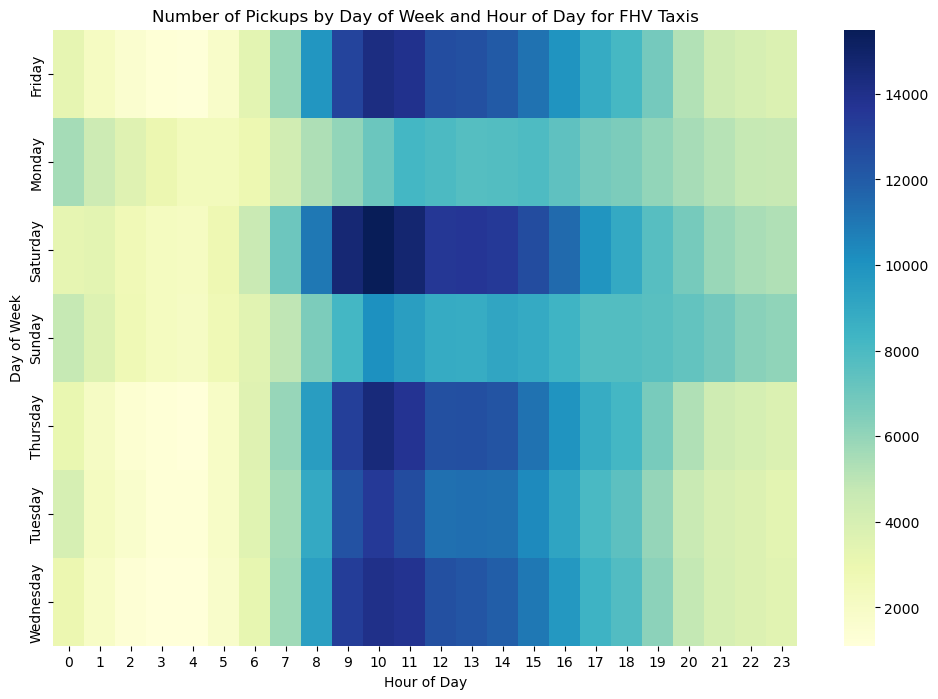

In [231]:
from pyspark.sql.functions import col, dayofweek, hour ,when
import seaborn as sns
import matplotlib.pyplot as plt


# Group by day of week and hour of day, and count the number of pickups
pickup_ts_fhv = df_thv3.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                               hour("pickup_datetime").alias("hour_of_day")) \
                      .count()

# Convert day of week to string representation
pickup_ts_fhv = pickup_ts_fhv.withColumn("day_of_week", 
                                         when(col("day_of_week") == 1, "Monday") \
                                         .when(col("day_of_week") == 2, "Tuesday") \
                                         .when(col("day_of_week") == 3, "Wednesday") \
                                         .when(col("day_of_week") == 4, "Thursday") \
                                         .when(col("day_of_week") == 5, "Friday") \
                                         .when(col("day_of_week") == 6, "Saturday") \
                                         .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
pickup_ts_fhv = pickup_ts_fhv.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_fhv_pd = pickup_ts_fhv.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_fhv_pivot = pickup_ts_fhv_pd.pivot(index="day_of_week", 
                                             columns="hour_of_day", 
                                             values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_fhv_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day for FHV Taxis")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()




# 2. The average fare by Day of Week and Hour of Day

# 3-The average trip duration

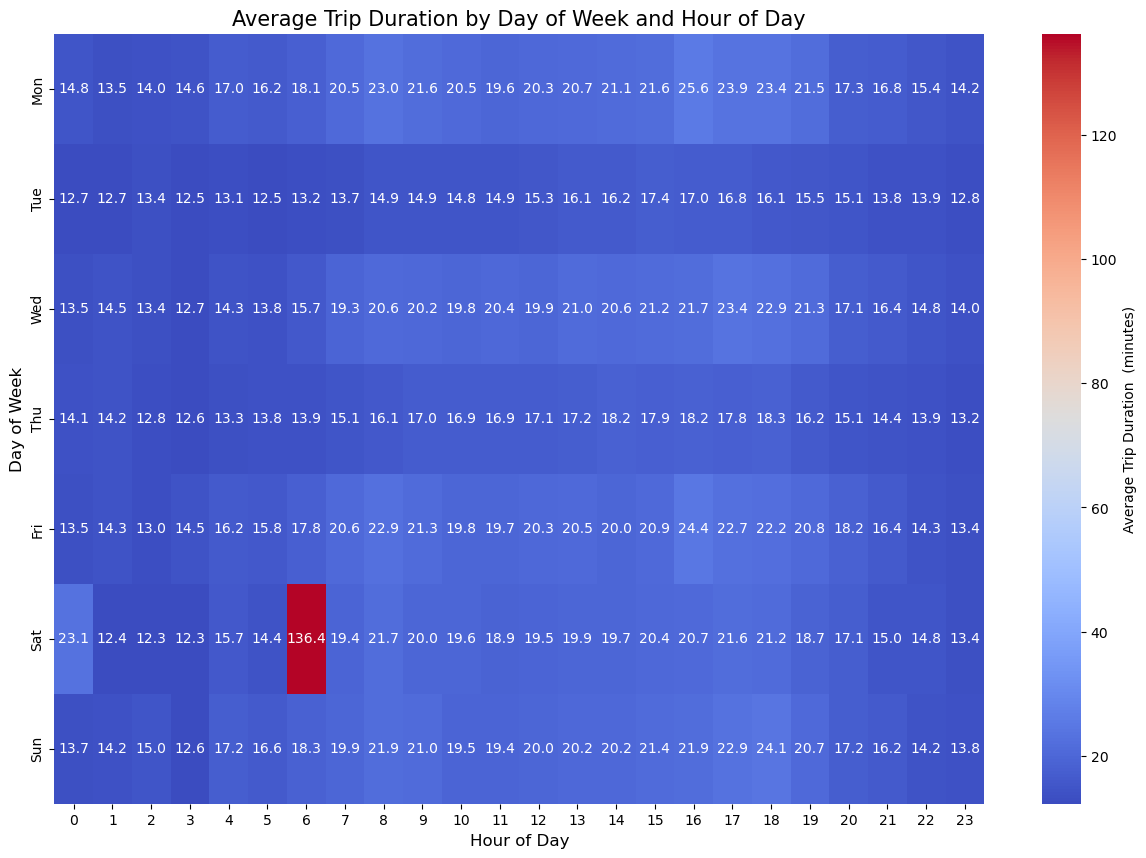

In [193]:


# Calculer la durée du trajet en minutes
df_fhv = df_thv3.withColumn("trip_duration", (unix_timestamp(col("dropOff_datetime")) - unix_timestamp(col("pickup_datetime")))/60)

# Grouper par jour de la semaine et heure de la journée
trip_duration_ts = df_fhv.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                                  hour("pickup_datetime").alias("hour_of_day")) \
                         .agg(avg("trip_duration").alias("average_trip_duration"))

# Convertir le jour de la semaine en représentation textuelle
trip_duration_ts = trip_duration_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Monday") \
                                 .when(col("day_of_week") == 2, "Tuesday") \
                                 .when(col("day_of_week") == 3, "Wednesday") \
                                 .when(col("day_of_week") == 4, "Thursday") \
                                 .when(col("day_of_week") == 5, "Friday") \
                                 .when(col("day_of_week") == 6, "Saturday") \
                                 .when(col("day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
trip_duration_ts = trip_duration_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
trip_duration_ts_pd = trip_duration_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
trip_duration_ts_pivot = trip_duration_ts_pd.pivot(index="day_of_week", 
                                                   columns="hour_of_day", 
                                                   values="average_trip_duration")



# Plot the heatmap
plt.figure(figsize=(15, 10)) # Increase figure size for better visibility
heatmap = sns.heatmap(trip_duration_ts_pivot, cmap='coolwarm', annot=True, fmt=".1f") # Use a different color scheme, add annotations and format them

plt.title('Average Trip Duration by Day of Week and Hour of Day', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(np.arange(0.5, len(median_duration_ts_pivot.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Change y-ticks to days of the week
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modify colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Average Trip Duration  (minutes)')

plt.show()

# 4-the average of ongoing trips

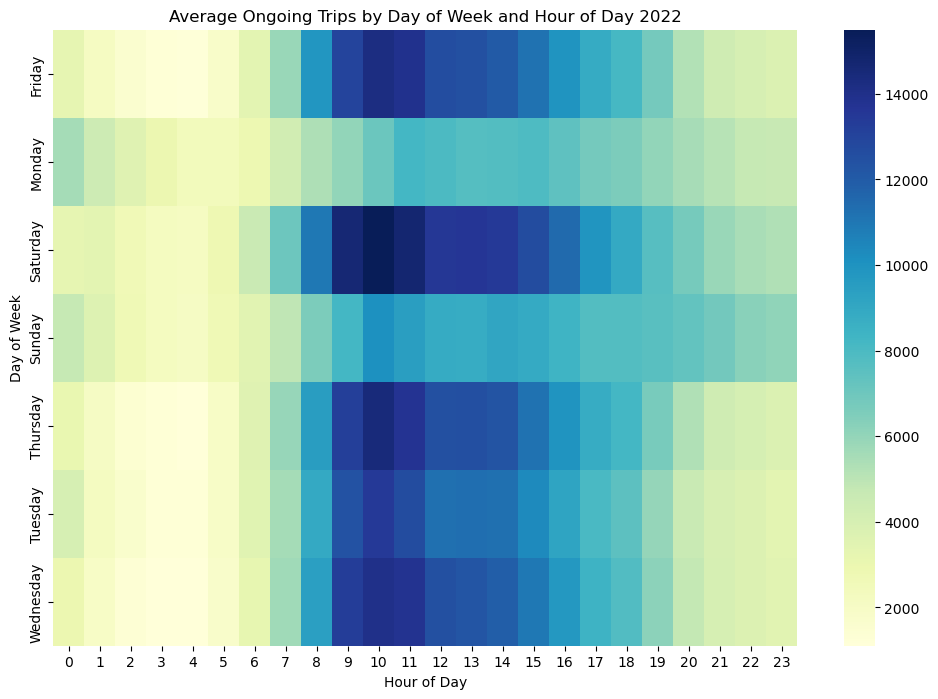

In [190]:
# Filtrer les trajets qui ont une heure de début et de fin
df_fhv = df_thv3.filter(col("pickup_datetime").isNotNull() & col("dropOff_datetime").isNotNull())

# Créer un DataFrame avec une ligne pour chaque heure où un trajet est en cours
ongoing_trips = df_fhv.select(dayofweek("pickup_datetime").alias("pickup_day_of_week"),
                              hour("pickup_datetime").alias("pickup_hour_of_day"),
                              dayofweek("dropOff_datetime").alias("dropOff_day_of_week"),
                              hour("dropOff_datetime").alias("dropOff_hour_of_day"))

# Calculer le nombre de trajets en cours pour chaque heure de chaque jour de la semaine
ongoing_trips_ts = ongoing_trips.groupBy("pickup_day_of_week", "pickup_hour_of_day") \
                                .agg(count("*").alias("average_ongoing_trips"))

# Convertir le jour de la semaine en représentation textuelle
ongoing_trips_ts = ongoing_trips_ts.withColumn("pickup_day_of_week", 
                                 when(col("pickup_day_of_week") == 1, "Monday") \
                                 .when(col("pickup_day_of_week") == 2, "Tuesday") \
                                 .when(col("pickup_day_of_week") == 3, "Wednesday") \
                                 .when(col("pickup_day_of_week") == 4, "Thursday") \
                                 .when(col("pickup_day_of_week") == 5, "Friday") \
                                 .when(col("pickup_day_of_week") == 6, "Saturday") \
                                 .when(col("pickup_day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
ongoing_trips_ts = ongoing_trips_ts.sort(col("pickup_day_of_week"), col("pickup_hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
ongoing_trips_ts_pivot = ongoing_trips_ts_pd.pivot(index="pickup_day_of_week", 
                                                   columns="pickup_hour_of_day", 
                                                   values="average_ongoing_trips")

# Créer un heatmap des données
plt.figure(figsize=(12, 8))
sns.heatmap(ongoing_trips_ts_pivot, cmap="YlGnBu")
plt.title("Average Ongoing Trips by Day of Week and Hour of Day 2022")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()




# Number of Pickups by Day of Week and Hour of Day mounth janury 2022 FHV

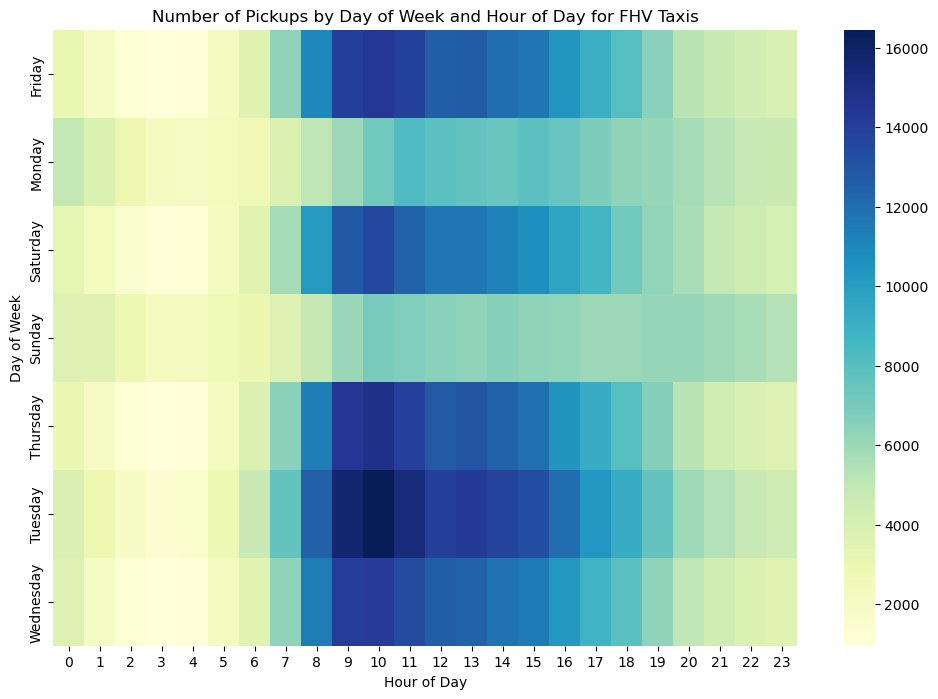

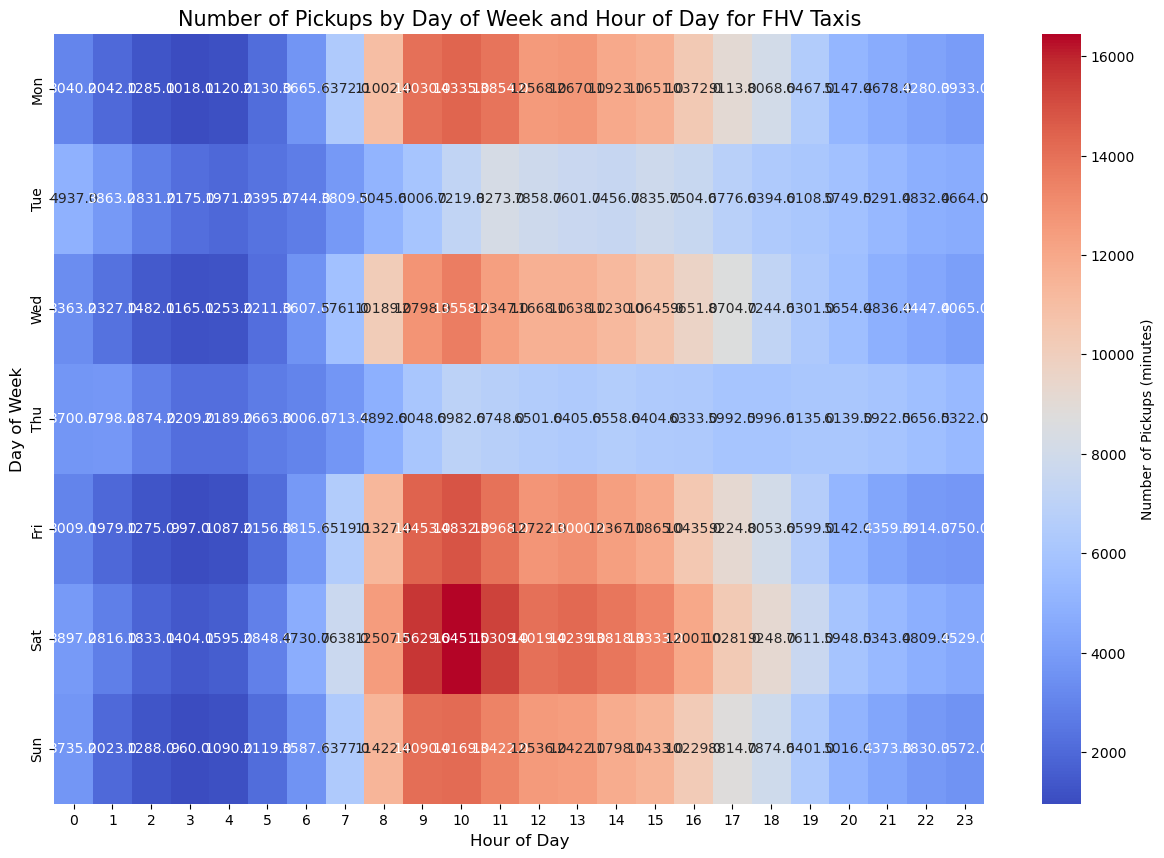

In [188]:
from pyspark.sql.functions import col, dayofweek, hour ,when
import seaborn as sns
import matplotlib.pyplot as plt


# Group by day of week and hour of day, and count the number of pickups
pickup_ts_fhv = df_thv4.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                               hour("pickup_datetime").alias("hour_of_day")) \
                      .count()

# Convert day of week to string representation
pickup_ts_fhv = pickup_ts_fhv.withColumn("day_of_week", 
                                         when(col("day_of_week") == 1, "Monday") \
                                         .when(col("day_of_week") == 2, "Tuesday") \
                                         .when(col("day_of_week") == 3, "Wednesday") \
                                         .when(col("day_of_week") == 4, "Thursday") \
                                         .when(col("day_of_week") == 5, "Friday") \
                                         .when(col("day_of_week") == 6, "Saturday") \
                                         .when(col("day_of_week") == 7, "Sunday"))

# Sort the data by day of week and hour of day
pickup_ts_fhv = pickup_ts_fhv.sort(col("day_of_week"), col("hour_of_day"))

# Convert the data to a Pandas dataframe for plotting
pickup_ts_fhv_pd = pickup_ts_fhv.toPandas()

# Pivot the data to create a 2D table indexed by day of week and hour of day
pickup_ts_fhv_pivot = pickup_ts_fhv_pd.pivot(index="day_of_week", 
                                             columns="hour_of_day", 
                                             values="count")

# Create a heatmap of the data
plt.figure(figsize=(12, 8))
sns.heatmap(pickup_ts_fhv_pivot, cmap="YlGnBu")
plt.title("Number of Pickups by Day of Week and Hour of Day for FHV Taxis")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()




In [111]:
df_thv1.printSchema()

root
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropOff_datetime: timestamp (nullable = true)
 |-- PUlocationID: double (nullable = true)
 |-- DOlocationID: double (nullable = true)
 |-- SR_Flag: double (nullable = true)
 |-- Affiliated_base_number: string (nullable = true)



# 2. The average fare by Day of Week and Hour of Day

# 3-The average trip duration

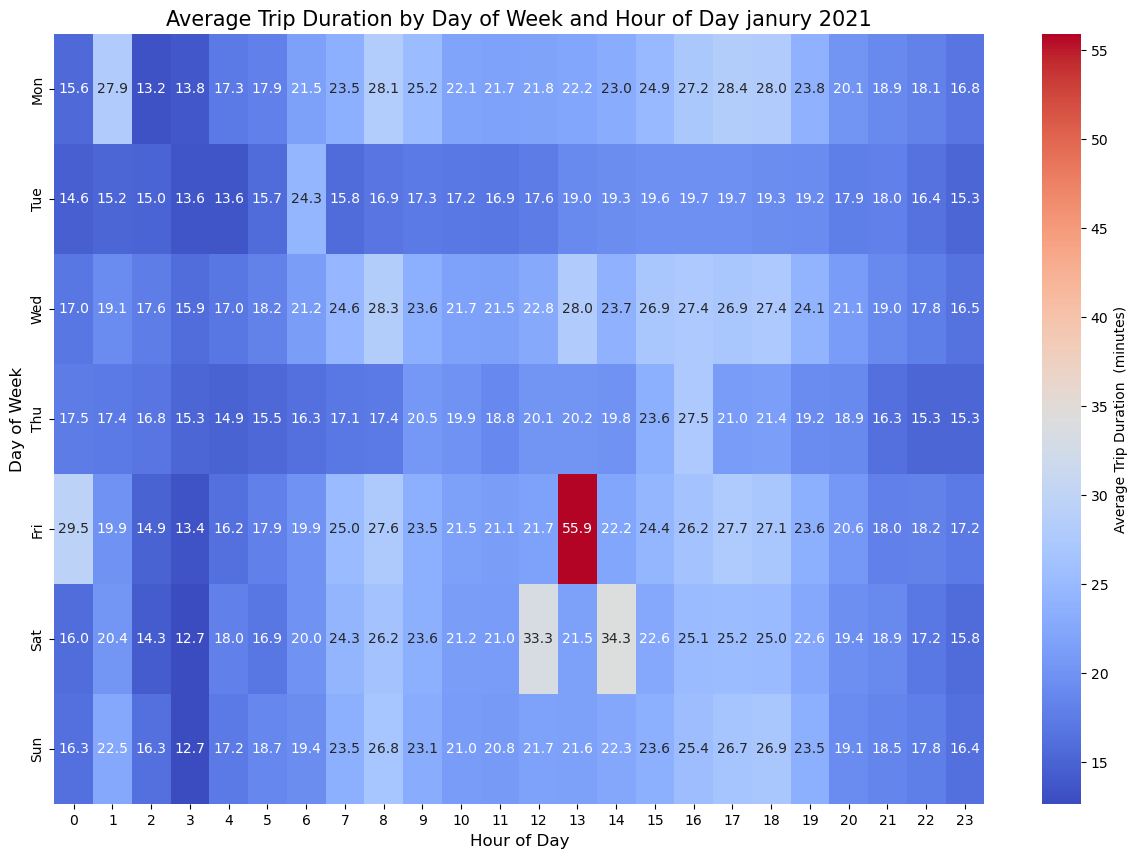

In [187]:


# Calculer la durée du trajet en minutes
df_fhv = df_thv4.withColumn("trip_duration", (unix_timestamp(col("dropOff_datetime")) - unix_timestamp(col("pickup_datetime")))/60)

# Grouper par jour de la semaine et heure de la journée
trip_duration_ts = df_fhv.groupBy(dayofweek("pickup_datetime").alias("day_of_week"),
                                  hour("pickup_datetime").alias("hour_of_day")) \
                         .agg(avg("trip_duration").alias("average_trip_duration"))

# Convertir le jour de la semaine en représentation textuelle
trip_duration_ts = trip_duration_ts.withColumn("day_of_week", 
                                 when(col("day_of_week") == 1, "Monday") \
                                 .when(col("day_of_week") == 2, "Tuesday") \
                                 .when(col("day_of_week") == 3, "Wednesday") \
                                 .when(col("day_of_week") == 4, "Thursday") \
                                 .when(col("day_of_week") == 5, "Friday") \
                                 .when(col("day_of_week") == 6, "Saturday") \
                                 .when(col("day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
trip_duration_ts = trip_duration_ts.sort(col("day_of_week"), col("hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
trip_duration_ts_pd = trip_duration_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
trip_duration_ts_pivot = trip_duration_ts_pd.pivot(index="day_of_week", 
                                                   columns="hour_of_day", 
                                                   values="average_trip_duration")


# Plot the heatmap
plt.figure(figsize=(15, 10)) # Increase figure size for better visibility
heatmap = sns.heatmap(trip_duration_ts_pivot, cmap='coolwarm', annot=True, fmt=".1f") # Use a different color scheme, add annotations and format them

plt.title('Average Trip Duration by Day of Week and Hour of Day janury 2021', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(np.arange(0.5, len(median_duration_ts_pivot.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Change y-ticks to days of the week
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modify colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Average Trip Duration  (minutes)')

plt.show()


# 4-the average of ongoing trips

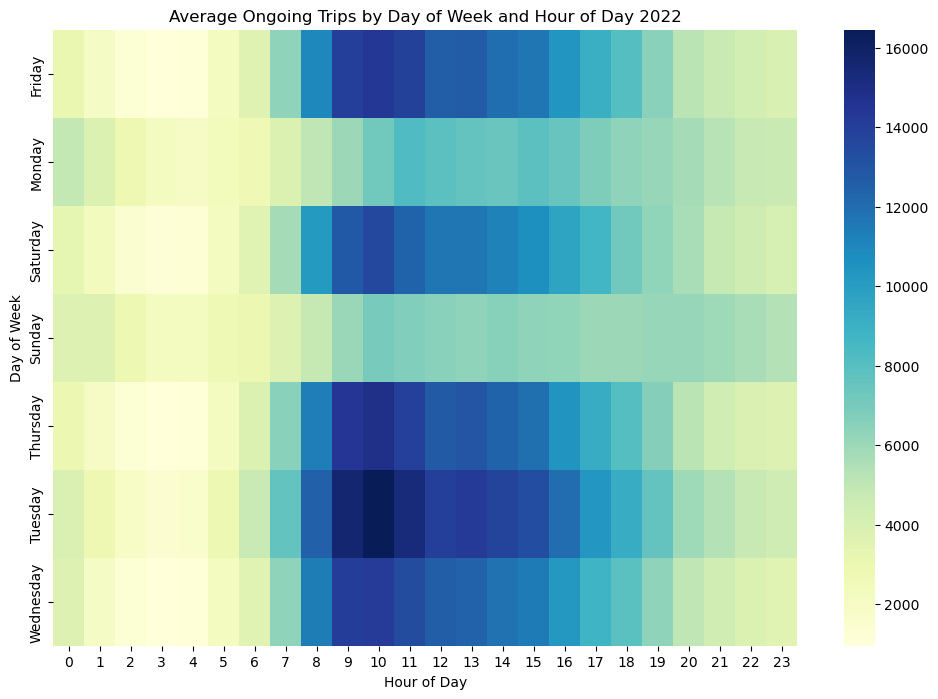

In [184]:

# Filtrer les trajets qui ont une heure de début et de fin
df_fhv = df_thv4.filter(col("pickup_datetime").isNotNull() & col("dropOff_datetime").isNotNull())

# Créer un DataFrame avec une ligne pour chaque heure où un trajet est en cours
ongoing_trips = df_fhv.select(dayofweek("pickup_datetime").alias("pickup_day_of_week"),
                              hour("pickup_datetime").alias("pickup_hour_of_day"),
                              dayofweek("dropOff_datetime").alias("dropOff_day_of_week"),
                              hour("dropOff_datetime").alias("dropOff_hour_of_day"))

# Calculer le nombre de trajets en cours pour chaque heure de chaque jour de la semaine
ongoing_trips_ts = ongoing_trips.groupBy("pickup_day_of_week", "pickup_hour_of_day") \
                                .agg(count("*").alias("average_ongoing_trips"))

# Convertir le jour de la semaine en représentation textuelle
ongoing_trips_ts = ongoing_trips_ts.withColumn("pickup_day_of_week", 
                                 when(col("pickup_day_of_week") == 1, "Monday") \
                                 .when(col("pickup_day_of_week") == 2, "Tuesday") \
                                 .when(col("pickup_day_of_week") == 3, "Wednesday") \
                                 .when(col("pickup_day_of_week") == 4, "Thursday") \
                                 .when(col("pickup_day_of_week") == 5, "Friday") \
                                 .when(col("pickup_day_of_week") == 6, "Saturday") \
                                 .when(col("pickup_day_of_week") == 7, "Sunday"))

# Trier les données par jour de la semaine et heure de la journée
ongoing_trips_ts = ongoing_trips_ts.sort(col("pickup_day_of_week"), col("pickup_hour_of_day"))

# Convertir les données en un DataFrame Pandas pour le traçage
ongoing_trips_ts_pd = ongoing_trips_ts.toPandas()

# Pivoter les données pour créer une table 2D indexée par le jour de la semaine et l'heure de la journée
ongoing_trips_ts_pivot = ongoing_trips_ts_pd.pivot(index="pickup_day_of_week", 
                                                   columns="pickup_hour_of_day", 
                                                   values="average_ongoing_trips")

# Créer un heatmap des données
plt.figure(figsize=(12, 8))
sns.heatmap(ongoing_trips_ts_pivot, cmap="YlGnBu")
plt.title("Average Ongoing Trips by Day of Week and Hour of Day 2022")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()



# Rides to the airports



# 1. Median duration of taxi trip leaving Midtown (Southern Manhattan) headed for JFK Airport Janury 2021

In [181]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

# Define a function to calculate the median of a group
def percentile_approx(col, percentile, accuracy=10000):
    return F.expr(f'percentile_approx({col}, {percentile}, {accuracy})')

# Define the Midtown and JFK location IDs
midtown_id = 164 # Your Midtown location ID
jfk_id = 132 # Your JFK location ID

# Filter the data for rides from Midtown to JFK
df_jfk  = df_yt14.filter((col("PULocationID").isin(midtown_id))&
                           (col("DOLocationID").isin(jfk_id)))

df_jfk = df_jfk.withColumn('trip_duration', 
                           (F.col('tpep_dropoff_datetime').cast('long') - F.col('tpep_pickup_datetime').cast('long')) / F.lit(60))


# Extract the day of the week and hour of the day from the pickup timestamp
df_jfk = df_jfk.withColumn('day_of_week', F.dayofweek('tpep_pickup_datetime'))
df_jfk = df_jfk.withColumn('hour_of_day', F.hour('tpep_pickup_datetime'))

# Group by day of the week and hour of day, and calculate the median trip duration
median_duration_ts = df_jfk.groupBy('day_of_week', 'hour_of_day') \
                           .agg(percentile_approx('trip_duration', 0.5).alias('median_duration'))

# Convert to Pandas for plotting
median_duration_ts_pd = median_duration_ts.toPandas()

# Pivot the data for a 2D heatmap representation
median_duration_ts_pivote = median_duration_ts_pd.pivot(index='day_of_week', columns='hour_of_day', values='median_duration')




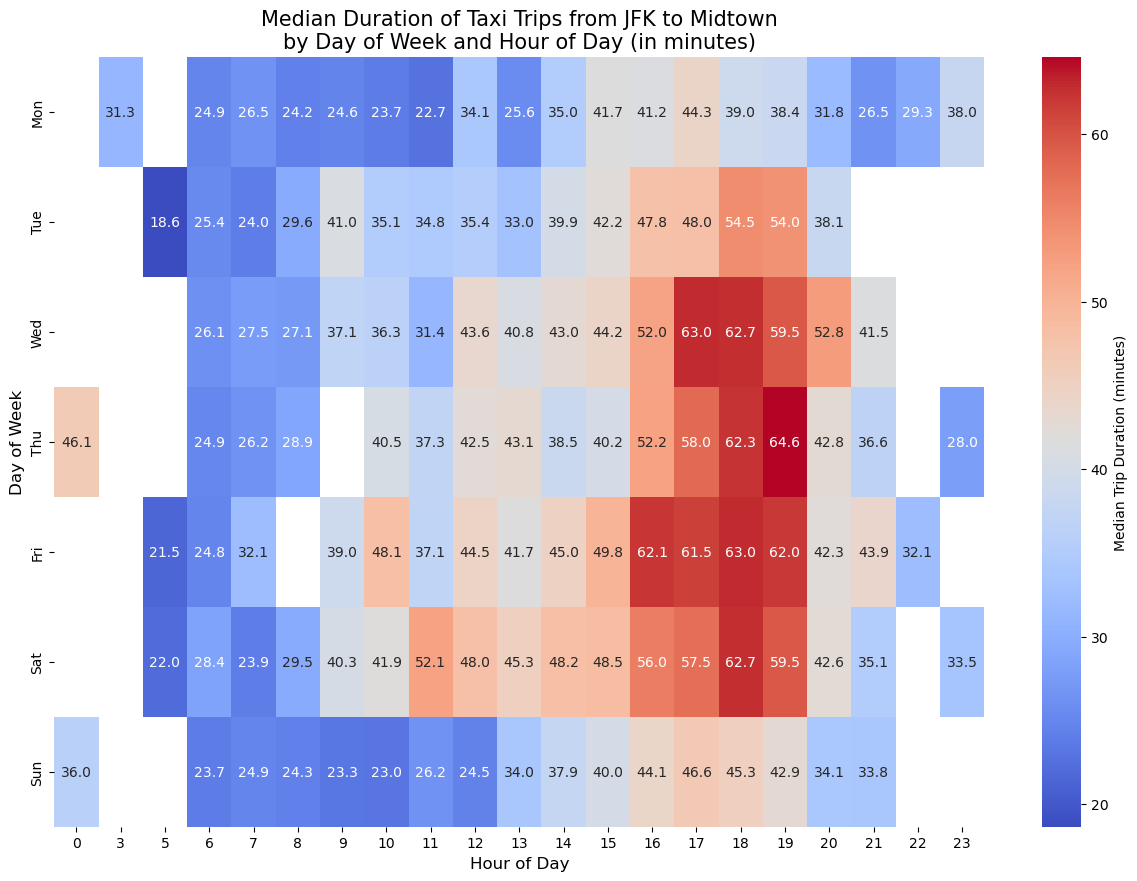

In [180]:
# Plot the heatmap
plt.figure(figsize=(15, 10)) # Increase figure size for better visibility
heatmap = sns.heatmap(median_duration_ts_pivote, cmap='coolwarm', annot=True, fmt=".1f") # Use a different color scheme, add annotations and format them

plt.title('Median Duration of Taxi Trips from Midtown to JFK by Day of Week and Hour of Day janury 2021', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(np.arange(0.5, len(median_duration_ts_pivot.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Change y-ticks to days of the week
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modify colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Median Trip Duration (minutes)')

plt.show()

# 2. Median taxi duration of trip leaving from JFK Airport to Midtown (Southern Manhat-an)

In [182]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

# Define a function to calculate the median of a group
def percentile_approx(col, percentile, accuracy=10000):
    return F.expr(f'percentile_approx({col}, {percentile}, {accuracy})')

# Define the Midtown and JFK location IDs
midtown_id = 164 # Your Midtown location ID
jfk_id = 132 # Your JFK location ID

# Filter the data for rides from JFK to Midtown
df_midtown  = df_yt3.filter((col("PULocationID").isin(jfk_id))&
                           (col("DOLocationID").isin(midtown_id)))

df_midtown = df_midtown.withColumn('trip_duration', 
                           (F.col('tpep_dropoff_datetime').cast('long') - F.col('tpep_pickup_datetime').cast('long')) / F.lit(60))


# Extract the day of the week and hour of the day from the pickup timestamp
df_midtown = df_midtown.withColumn('day_of_week', F.dayofweek('tpep_pickup_datetime'))
df_midtown = df_midtown.withColumn('hour_of_day', F.hour('tpep_pickup_datetime'))

# Group by day of the week and hour of day, and calculate the median trip duration
median_duration_ts = df_midtown.groupBy('day_of_week', 'hour_of_day') \
                           .agg(percentile_approx('trip_duration', 0.5).alias('median_duration'))

# Convert to Pandas for plotting
median_duration_ts_pd = median_duration_ts.toPandas()

# Pivot the data for a 2D heatmap representation
median_duration_ts_pivot = median_duration_ts_pd.pivot(index='day_of_week', columns='hour_of_day', values='median_duration')



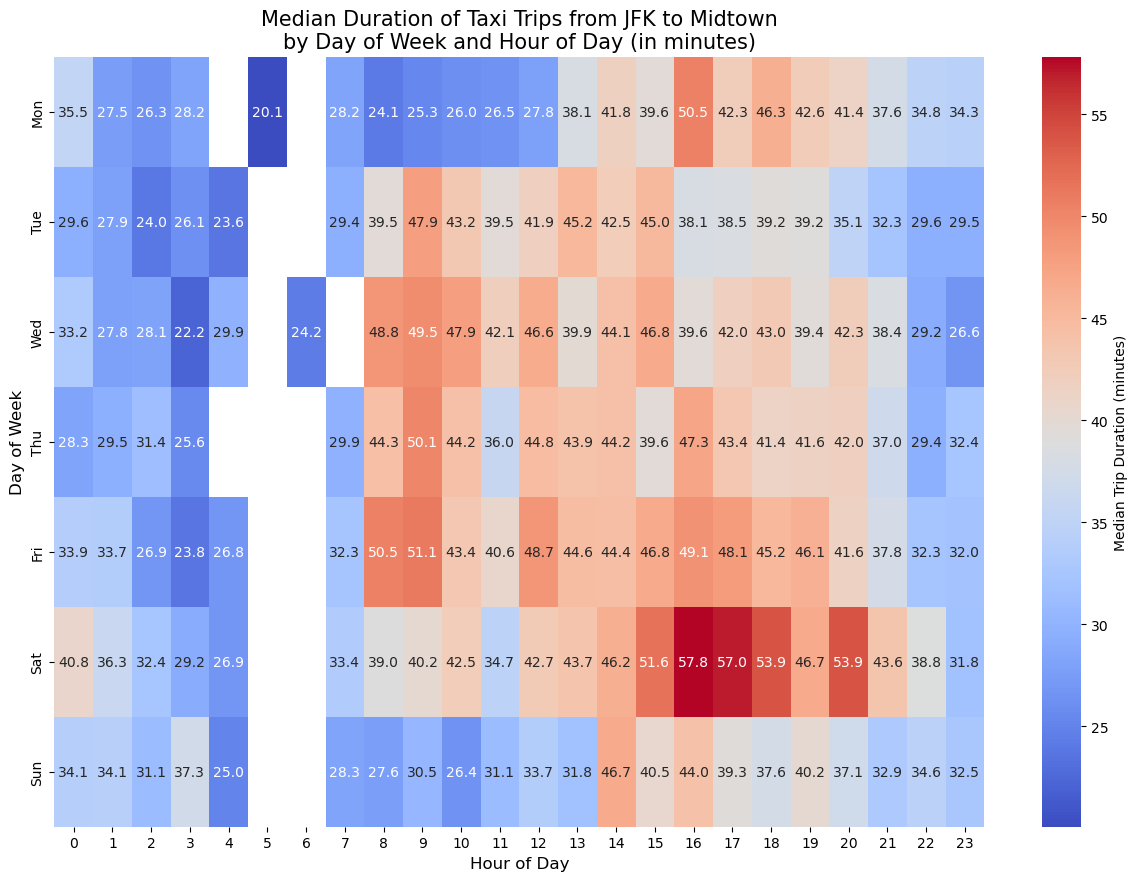

In [223]:
# Plot the heatmap
plt.figure(figsize=(15, 10)) # Increase figure size for better visibility
heatmap = sns.heatmap(median_duration_ts_pivot, cmap='coolwarm', annot=True, fmt=".1f") # Use a different color scheme, add annotations and format them

plt.title('Median Duration of Taxi Trips from JFK to Midtown\nby Day of Week and Hour of Day (in minutes)', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(np.arange(0.5, len(median_duration_ts_pivot.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # Change y-ticks to days of the week
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Modify colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Median Trip Duration (minutes)')

plt.show()


# Geographic information


In [206]:
import requests, zipfile, io
from pathlib import Path

path = Path('taxi_zone.parquet')
if not path.exists():
    url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip"
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(path='./')

# 1.1 number of pickups

In [1]:
import geopandas as gpd

# Load the NYC Taxi Zone shapefile
df_taxi_zones = gpd.read_file('./taxi_zones.shp')


# 1.1.1yellow taxi mars 2019

In [ ]:
from pyspark.sql.functions import count

# Calculate number of pickups per PULocationID
df_pickups = df_yt3.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)


# 1.1.2yellow taxi janury 2020

<AxesSubplot:>

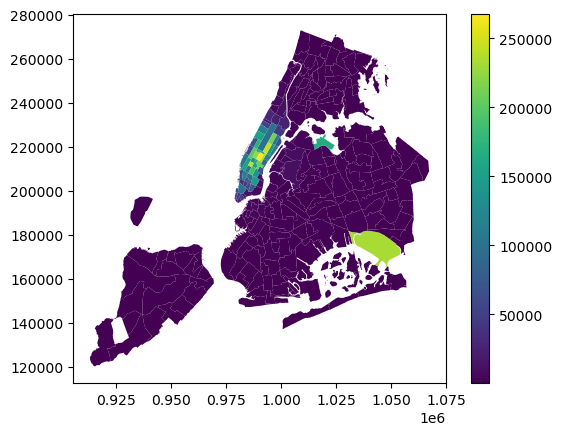

In [256]:
from pyspark.sql.functions import count

# Calculate number of pickups per PULocationID
df_pickups = df_yt13.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)

# 1.1.3 yellow taxi janury 2021

<AxesSubplot:>

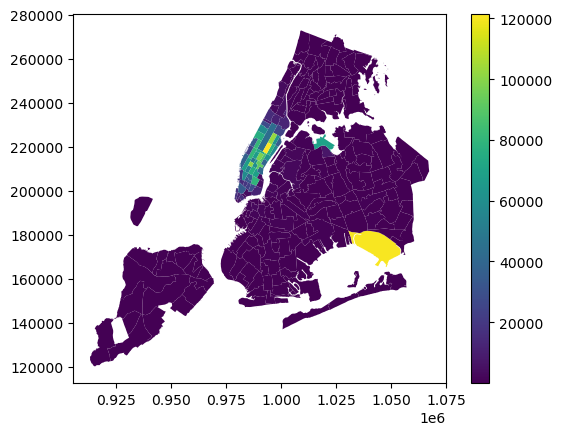

In [255]:
from pyspark.sql.functions import count

# Calculate number of pickups per PULocationID
df_pickups = df_yt14.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)

# 1.1.4yellow taxi janury 2022

<AxesSubplot:>

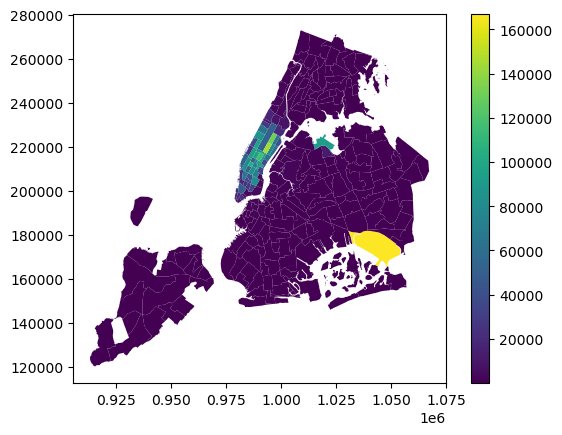

In [257]:
from pyspark.sql.functions import count

# Calculate number of pickups per PULocationID
df_pickups = df_yt15.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)

# 1.1.5 fhv janury 2019

<AxesSubplot:>

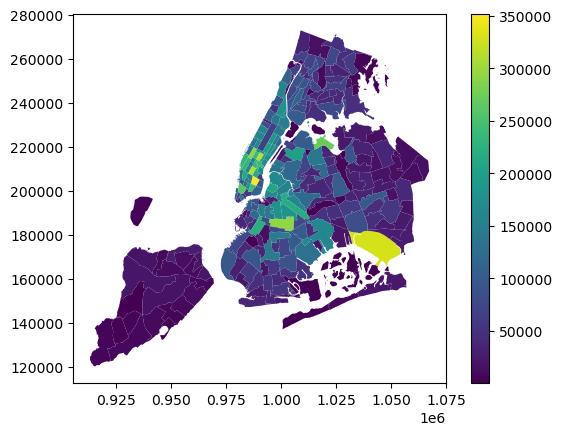

In [261]:


# Calculate number of pickups per PULocationID
df_pickups_fhv = df_thv1.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)



# # 1.1.6 fhv janury 2020

<AxesSubplot:>

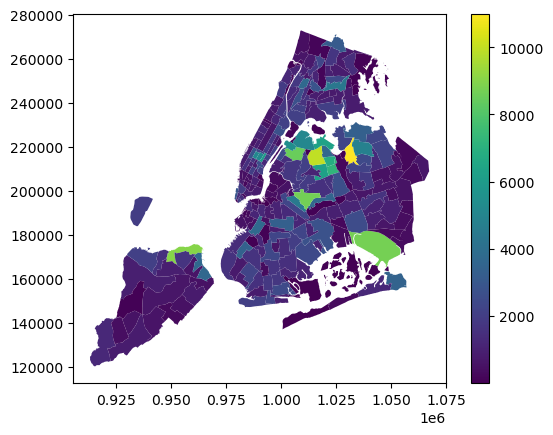

In [262]:


# Calculate number of pickups per PULocationID
df_pickups_fhv = df_thv2.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)


# 1.1.7 fhv janury 2021

<AxesSubplot:>

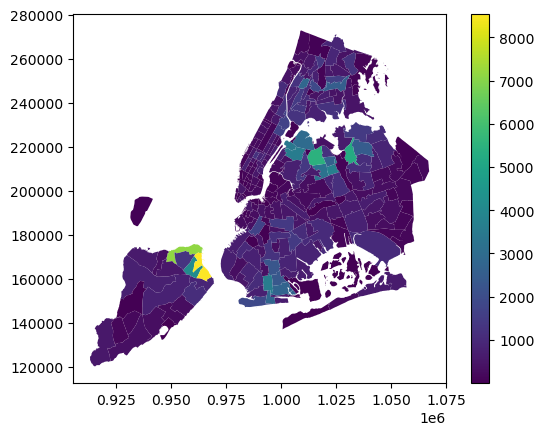

In [263]:


# Calculate number of pickups per PULocationID
df_pickups_fhv = df_thv3.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)


# 1.1.8 fhv janury 2022

<AxesSubplot:>

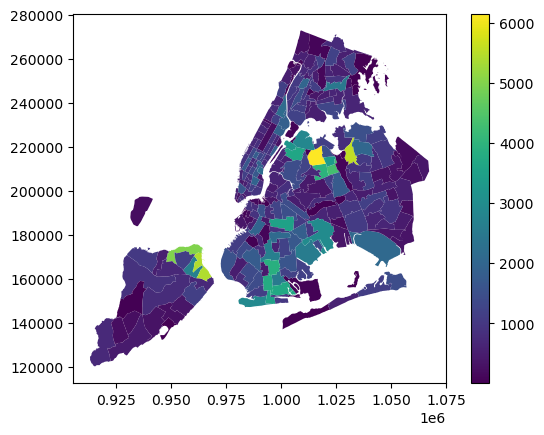

In [264]:


# Calculate number of pickups per PULocationID
df_pickups_fhv = df_thv4.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)


# 1.2 number of dropoffs

# 1.2.1 yellow taxi janury 2019 2020 2021 2022

<AxesSubplot:>

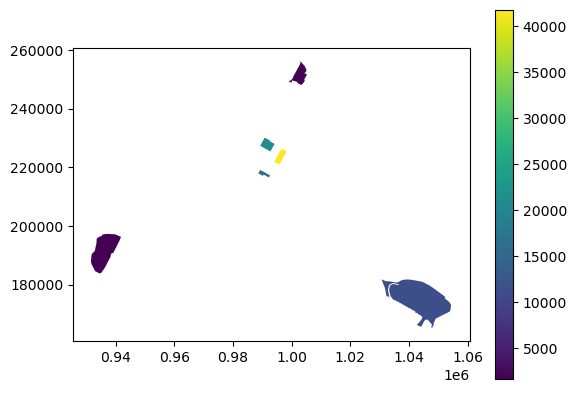

In [265]:

from pyspark.sql.functions import count

df_dropoffs = df_yt1.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))
df_dropoffs_pd = df_dropoffs.toPandas()
taxi_zones['LocationID'] = taxi_zones['LocationID'].astype(int)
df_dropoffs_pd['DOLocationID'] = df_dropoffs_pd['DOLocationID'].astype(int)
df_merged = taxi_zones.merge(df_dropoffs_pd, left_on='LocationID', right_on='DOLocationID')
fig, ax = plt.subplots(1, 1)
df_merged.plot(column='dropoff_count', ax=ax, legend=True)



<AxesSubplot:>

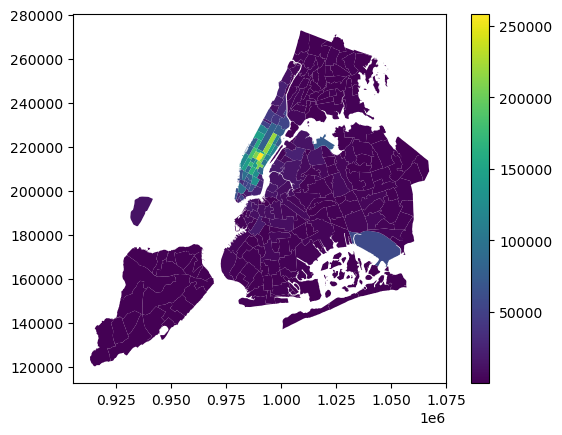

In [266]:


df_dropoffs = df_yt13.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))
df_dropoffs_pd = df_dropoffs.toPandas()
taxi_zones['LocationID'] = taxi_zones['LocationID'].astype(int)
df_dropoffs_pd['DOLocationID'] = df_dropoffs_pd['DOLocationID'].astype(int)
df_merged = taxi_zones.merge(df_dropoffs_pd, left_on='LocationID', right_on='DOLocationID')
fig, ax = plt.subplots(1, 1)
df_merged.plot(column='dropoff_count', ax=ax, legend=True)


<AxesSubplot:>

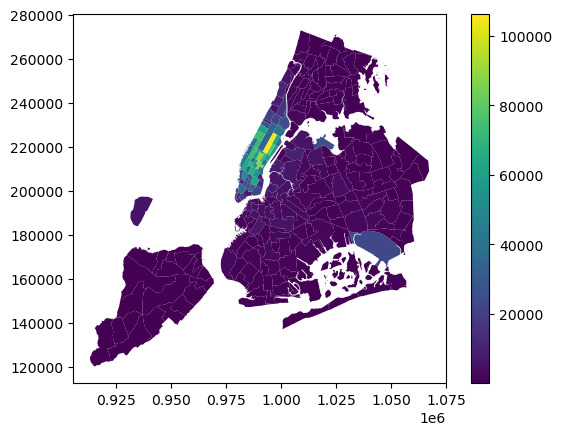

In [267]:



df_dropoffs = df_yt14.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))
df_dropoffs_pd = df_dropoffs.toPandas()
taxi_zones['LocationID'] = taxi_zones['LocationID'].astype(int)
df_dropoffs_pd['DOLocationID'] = df_dropoffs_pd['DOLocationID'].astype(int)
df_merged = taxi_zones.merge(df_dropoffs_pd, left_on='LocationID', right_on='DOLocationID')
fig, ax = plt.subplots(1, 1)
df_merged.plot(column='dropoff_count', ax=ax, legend=True)


<AxesSubplot:>

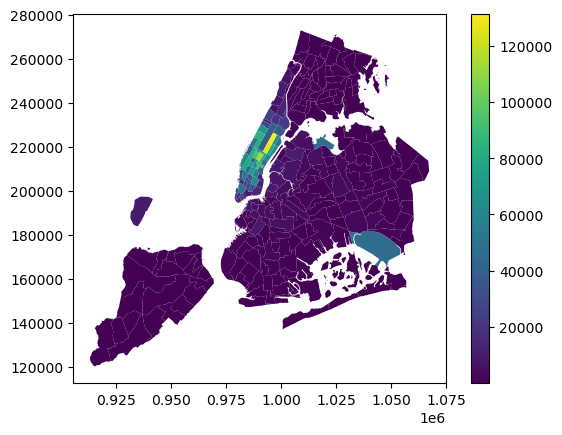

In [268]:

from pyspark.sql.functions import count

df_dropoffs = df_yt15.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))
df_dropoffs_pd = df_dropoffs.toPandas()
taxi_zones['LocationID'] = taxi_zones['LocationID'].astype(int)
df_dropoffs_pd['DOLocationID'] = df_dropoffs_pd['DOLocationID'].astype(int)
df_merged = taxi_zones.merge(df_dropoffs_pd, left_on='LocationID', right_on='DOLocationID')
fig, ax = plt.subplots(1, 1)
df_merged.plot(column='dropoff_count', ax=ax, legend=True)


# # 1.2.2 fhv 2019 2020 2021 2022

<AxesSubplot:>

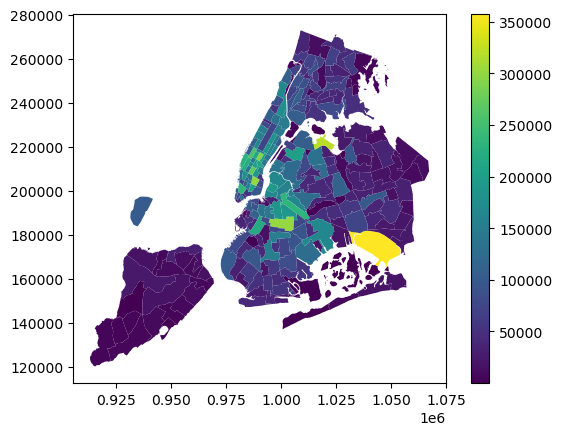

In [271]:


# Calculate number of dropoffs per DOLocationID
df_dropoffs_fhv = df_thv1.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))

# Convert to pandas dataframe
df_dropoffs_fhv_pd = df_dropoffs_fhv.toPandas()

# Drop rows with NaN or inf 'DOLocationID'
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd.dropna(subset=['DOLocationID'])
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd[np.isfinite(df_dropoffs_fhv_pd['DOLocationID'])]

# Convert 'DOLocationID' to integer
df_dropoffs_fhv_pd['DOLocationID'] = df_dropoffs_fhv_pd['DOLocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_fhv_pd, left_on='LocationID', right_on='DOLocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='dropoff_count', ax=ax, legend=True)


<AxesSubplot:>

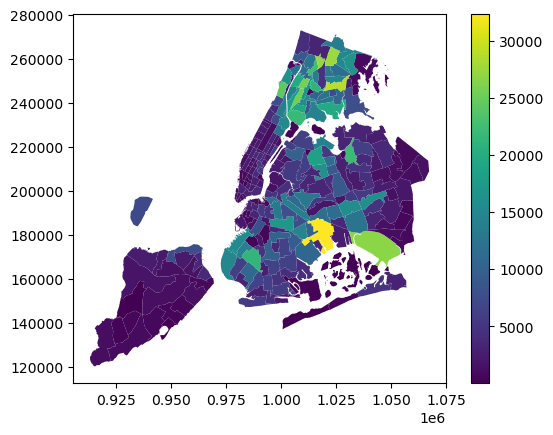

In [272]:
# Calculate number of dropoffs per DOLocationID
df_dropoffs_fhv = df_thv2.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))

# Convert to pandas dataframe
df_dropoffs_fhv_pd = df_dropoffs_fhv.toPandas()

# Drop rows with NaN or inf 'DOLocationID'
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd.dropna(subset=['DOLocationID'])
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd[np.isfinite(df_dropoffs_fhv_pd['DOLocationID'])]

# Convert 'DOLocationID' to integer
df_dropoffs_fhv_pd['DOLocationID'] = df_dropoffs_fhv_pd['DOLocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_fhv_pd, left_on='LocationID', right_on='DOLocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='dropoff_count', ax=ax, legend=True)


<AxesSubplot:>

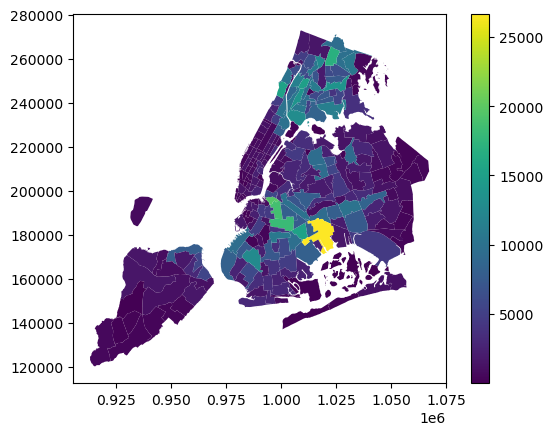

In [273]:
# Calculate number of dropoffs per DOLocationID
df_dropoffs_fhv = df_thv3.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))

# Convert to pandas dataframe
df_dropoffs_fhv_pd = df_dropoffs_fhv.toPandas()

# Drop rows with NaN or inf 'DOLocationID'
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd.dropna(subset=['DOLocationID'])
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd[np.isfinite(df_dropoffs_fhv_pd['DOLocationID'])]

# Convert 'DOLocationID' to integer
df_dropoffs_fhv_pd['DOLocationID'] = df_dropoffs_fhv_pd['DOLocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_fhv_pd, left_on='LocationID', right_on='DOLocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='dropoff_count', ax=ax, legend=True)


<AxesSubplot:>

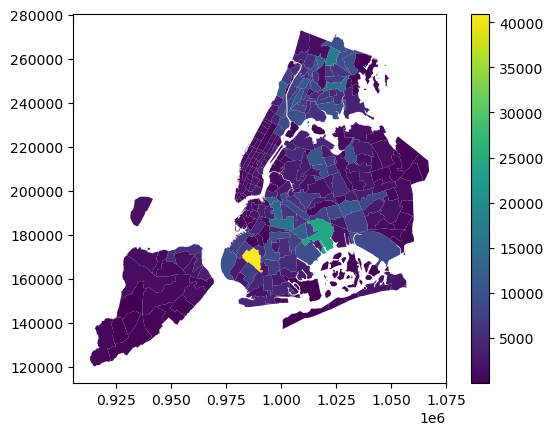

In [274]:
# Calculate number of dropoffs per DOLocationID
df_dropoffs_fhv = df_thv4.groupby("DOLocationID").agg(count("*").alias("dropoff_count"))

# Convert to pandas dataframe
df_dropoffs_fhv_pd = df_dropoffs_fhv.toPandas()

# Drop rows with NaN or inf 'DOLocationID'
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd.dropna(subset=['DOLocationID'])
df_dropoffs_fhv_pd = df_dropoffs_fhv_pd[np.isfinite(df_dropoffs_fhv_pd['DOLocationID'])]

# Convert 'DOLocationID' to integer
df_dropoffs_fhv_pd['DOLocationID'] = df_dropoffs_fhv_pd['DOLocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_fhv_pd, left_on='LocationID', right_on='DOLocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='dropoff_count', ax=ax, legend=True)


# 1.3 number of pickups with dropoff at some airport (JFK, LaGuardia, Newark)

# 1.3.1 yellow taxi mars 2019  janury 2020 2021 2022

<AxesSubplot:>

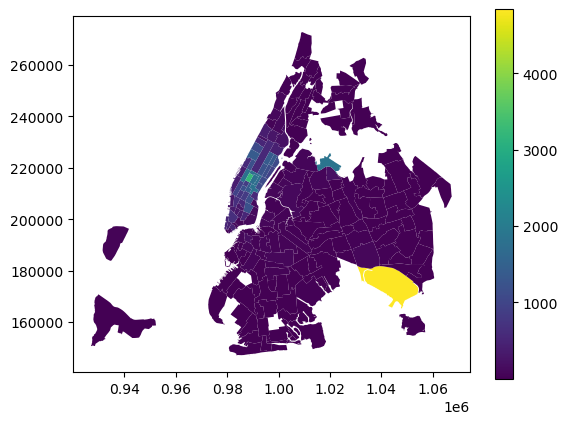

In [278]:
# Define the airport IDs
jfk_id = 132
laguardia_id = 138
newark_id = 1

# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs = df_yt3.filter(df_yt3["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups = df_airport_dropoffs.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)

<AxesSubplot:>

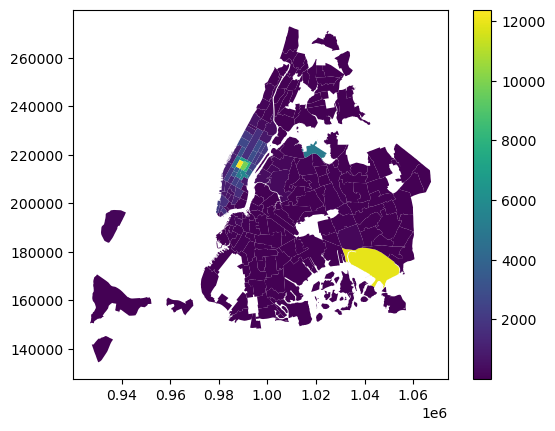

In [280]:
# Define the airport IDs
jfk_id = 132
laguardia_id = 138
newark_id = 1

# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs = df_yt13.filter(df_yt13["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups = df_airport_dropoffs.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)

<AxesSubplot:>

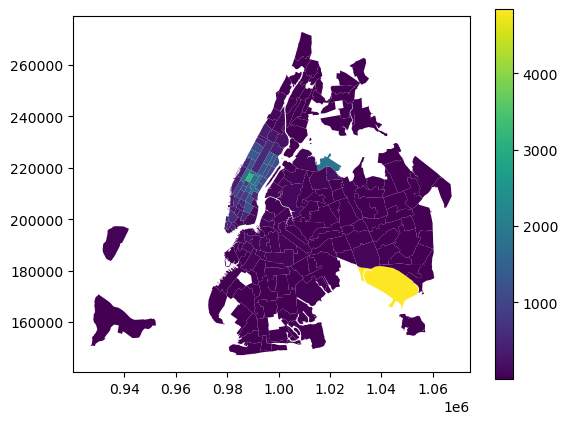

In [281]:
# Define the airport IDs
jfk_id = 132
laguardia_id = 138
newark_id = 1

# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs = df_yt14.filter(df_yt14["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups = df_airport_dropoffs.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)

<AxesSubplot:>

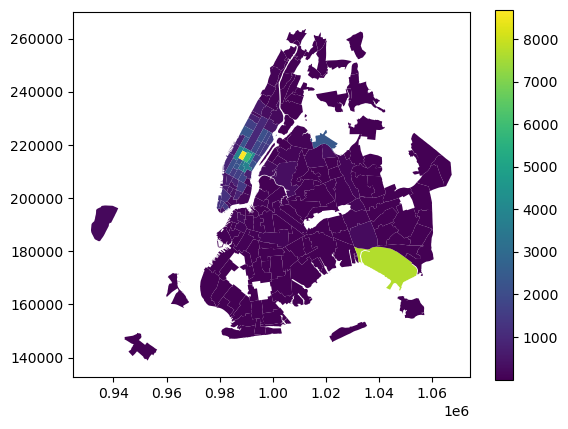

In [282]:
# Define the airport IDs
jfk_id = 132
laguardia_id = 138
newark_id = 1

# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs = df_yt15.filter(df_yt15["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups = df_airport_dropoffs.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge with the taxi zones dataframe
df_merged_pickups = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
df_merged_pickups.plot(column='pickup_count', ax=ax, legend=True)

# 1.3.2 fhv 2019 2020 2021 2022

<AxesSubplot:>

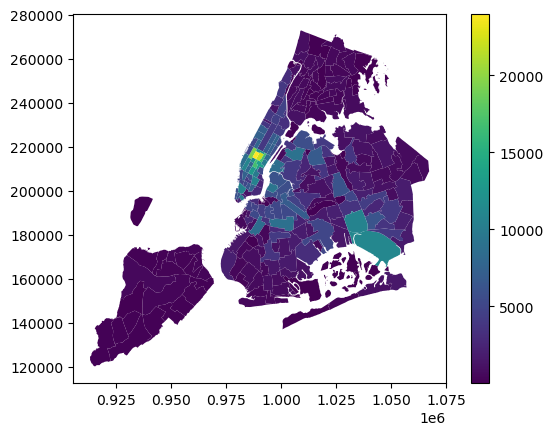

In [285]:


# Define the airport IDs
jfk_id = 132
laguardia_id = 138
newark_id = 1

# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs_fhv = df_thv1.filter(df_thv1["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups_fhv = df_airport_dropoffs_fhv.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)


<AxesSubplot:>

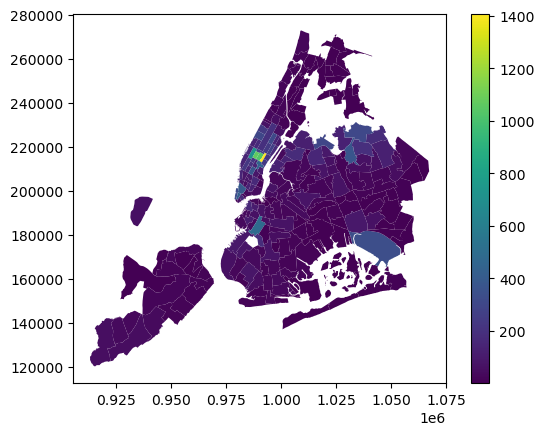

In [286]:
# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs_fhv = df_thv2.filter(df_thv2["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups_fhv = df_airport_dropoffs_fhv.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)

<AxesSubplot:>

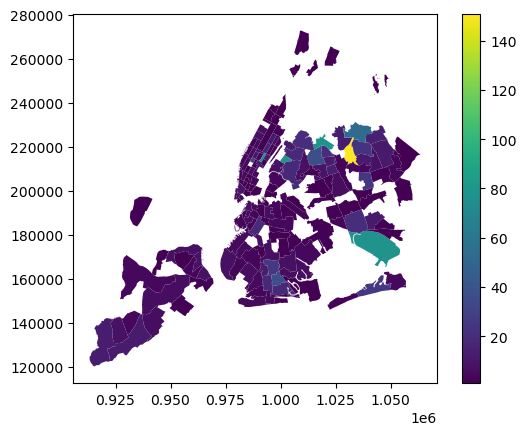

In [287]:
# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs_fhv = df_thv3.filter(df_thv3["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups_fhv = df_airport_dropoffs_fhv.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)

<AxesSubplot:>

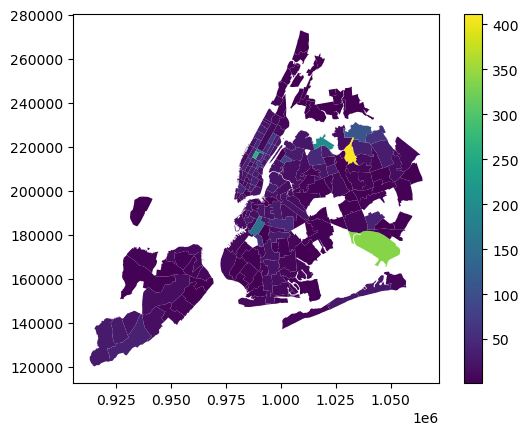

In [288]:
# Filter the data for rides dropped off at the specified airports
df_airport_dropoffs_fhv = df_thv4.filter(df_thv4["DOLocationID"].isin(jfk_id, laguardia_id, newark_id))

# Calculate number of pickups per PULocationID for these filtered rides
df_pickups_fhv = df_airport_dropoffs_fhv.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Drop rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge with the taxi zones dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot
fig, ax = plt.subplots(1, 1)
gdf_zones.plot(column='pickup_count', ax=ax, legend=True)

# 2.1. number of pickups in the area

# 2.1.1 yellew taxi mars 2019 janury 2020 2021 2022 

<AxesSubplot:>

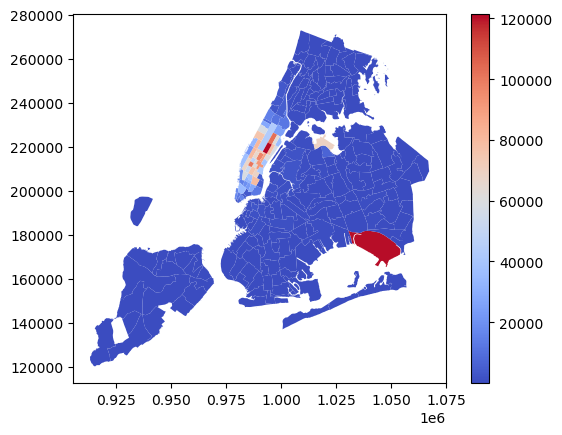

In [290]:

import geopandas as gpd
from pyspark.sql.functions import count



# Count the number of pickups per PULocationID
df_pickups = df_yt3.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

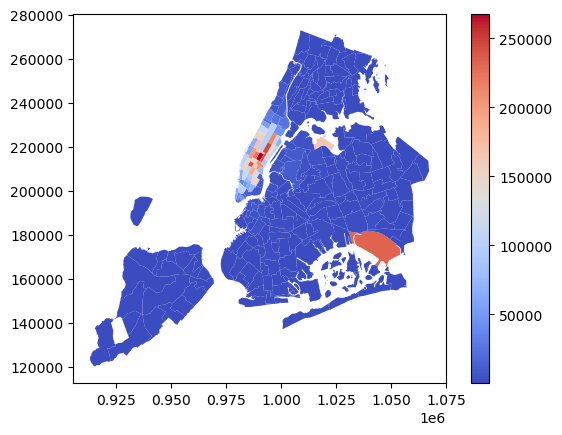

In [291]:
import geopandas as gpd
from pyspark.sql.functions import count



# Count the number of pickups per PULocationID
df_pickups = df_yt13.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

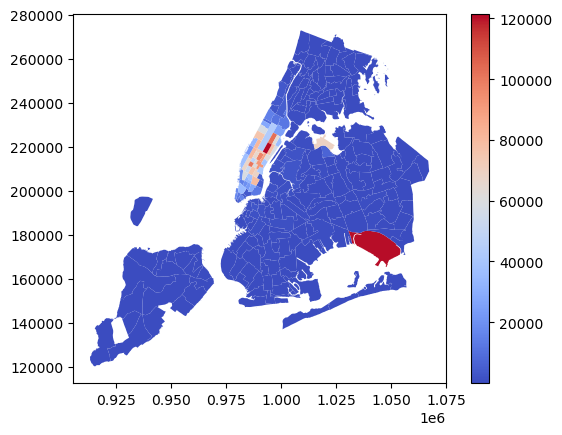

In [292]:
import geopandas as gpd
from pyspark.sql.functions import count



# Count the number of pickups per PULocationID
df_pickups = df_yt14.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

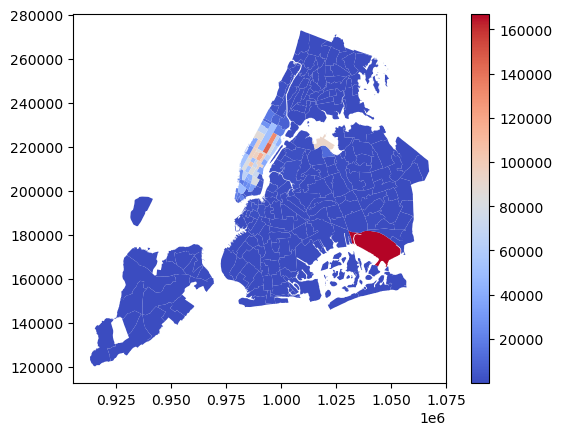

In [293]:
import geopandas as gpd
from pyspark.sql.functions import count



# Count the number of pickups per PULocationID
df_pickups = df_yt15.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_pd = df_pickups.toPandas()
df_pickups_pd['PULocationID'] = df_pickups_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = taxi_zones.merge(df_pickups_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')


# 2.1.2 fhv 2019 2020 2021 2022 

<AxesSubplot:>

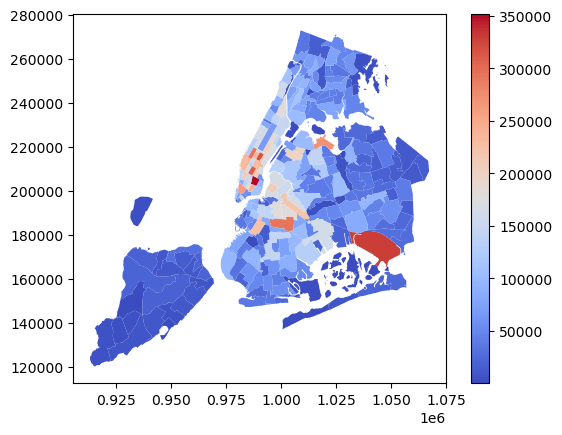

In [295]:


# Count the number of pickups per PULocationID
df_pickups_fhv = df_thv1.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Clean the dataframe to remove rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the taxi zones shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')



<AxesSubplot:>

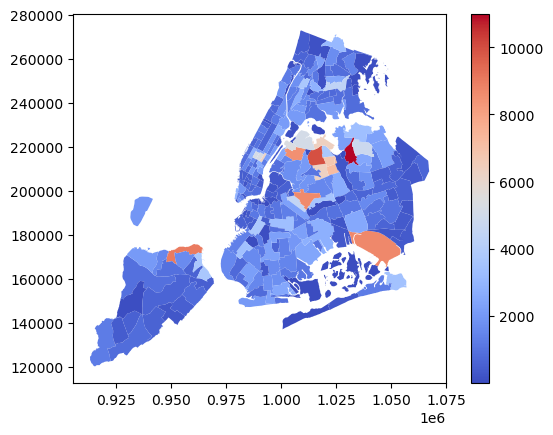

In [296]:
# Count the number of pickups per PULocationID
df_pickups_fhv = df_thv2.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Clean the dataframe to remove rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the taxi zones shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

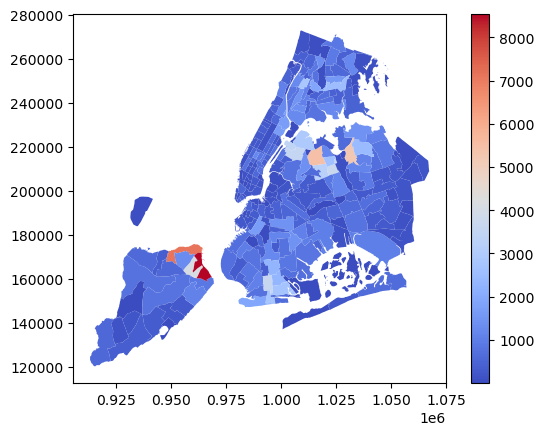

In [297]:
# Count the number of pickups per PULocationID
df_pickups_fhv = df_thv3.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Clean the dataframe to remove rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the taxi zones shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

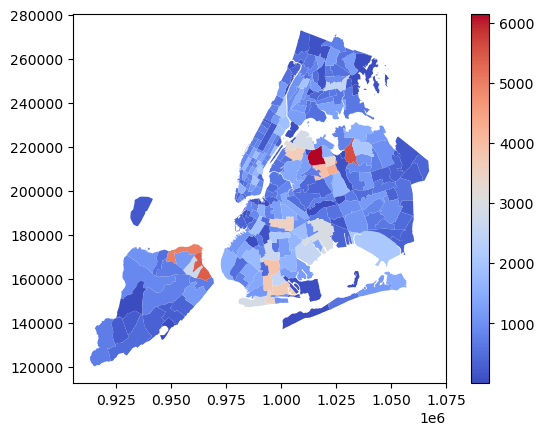

In [298]:
# Count the number of pickups per PULocationID
df_pickups_fhv = df_thv4.groupby("PULocationID").agg(count("*").alias("pickup_count"))

# Convert to pandas dataframe
df_pickups_fhv_pd = df_pickups_fhv.toPandas()

# Clean the dataframe to remove rows with NaN or inf 'PULocationID'
df_pickups_fhv_pd = df_pickups_fhv_pd.dropna(subset=['PULocationID'])
df_pickups_fhv_pd = df_pickups_fhv_pd[np.isfinite(df_pickups_fhv_pd['PULocationID'])]

# Convert 'PULocationID' to integer
df_pickups_fhv_pd['PULocationID'] = df_pickups_fhv_pd['PULocationID'].astype(int)

# Load the taxi zones shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)

# Merge the geo dataframe with the pickups dataframe
gdf_zones_merged = gdf_zones.merge(df_pickups_fhv_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='pickup_count', ax=ax, legend=True, cmap='coolwarm')


# 2.2 ratio of number of payments by card/number of cash payments for pickups in the area

# yellow taxi mars 2019 janury 2020 2021 2022 

<AxesSubplot:>

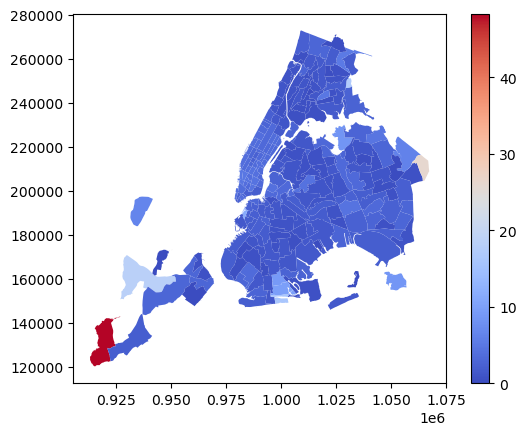

In [242]:
from pyspark.sql.functions import count, when, col

# Count the number of card and cash payments for each PULocationID
df_payments = df_yt3.groupBy("PULocationID").agg(
    count(when(col("payment_type") == 1, True)).alias("card_payments"),
    count(when(col("payment_type") == 2, True)).alias("cash_payments")
)

# Calculate the ratio of card payments to cash payments
df_payments = df_payments.withColumn("payment_ratio", col("card_payments") / col("cash_payments"))

# Convert to pandas dataframe
df_payments_pd = df_payments.toPandas()
df_payments_pd['PULocationID'] = df_payments_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the payments dataframe
gdf_zones_merged = taxi_zones.merge(df_payments_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='payment_ratio', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

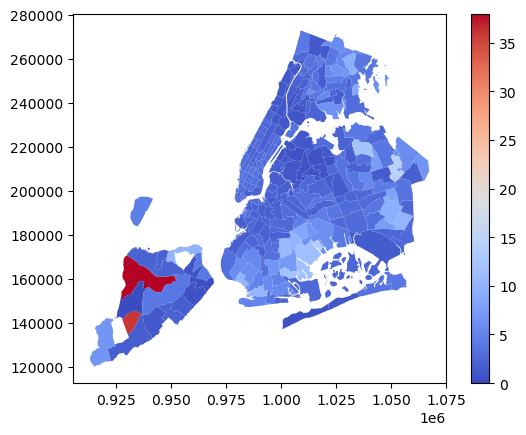

In [299]:
# Count the number of card and cash payments for each PULocationID
df_payments = df_yt13.groupBy("PULocationID").agg(
    count(when(col("payment_type") == 1, True)).alias("card_payments"),
    count(when(col("payment_type") == 2, True)).alias("cash_payments")
)

# Calculate the ratio of card payments to cash payments
df_payments = df_payments.withColumn("payment_ratio", col("card_payments") / col("cash_payments"))

# Convert to pandas dataframe
df_payments_pd = df_payments.toPandas()
df_payments_pd['PULocationID'] = df_payments_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the payments dataframe
gdf_zones_merged = taxi_zones.merge(df_payments_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='payment_ratio', ax=ax, legend=True, cmap='coolwarm')

<AxesSubplot:>

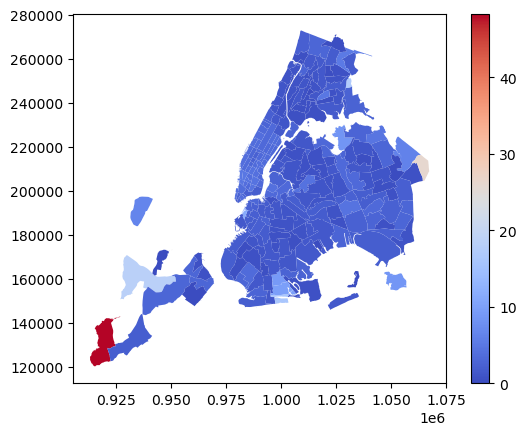

In [300]:
# Count the number of card and cash payments for each PULocationID
df_payments = df_yt14.groupBy("PULocationID").agg(
    count(when(col("payment_type") == 1, True)).alias("card_payments"),
    count(when(col("payment_type") == 2, True)).alias("cash_payments")
)

# Calculate the ratio of card payments to cash payments
df_payments = df_payments.withColumn("payment_ratio", col("card_payments") / col("cash_payments"))

# Convert to pandas dataframe
df_payments_pd = df_payments.toPandas()
df_payments_pd['PULocationID'] = df_payments_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the payments dataframe
gdf_zones_merged = taxi_zones.merge(df_payments_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='payment_ratio', ax=ax, legend=True, cmap='coolwarm')

<AxesSubplot:>

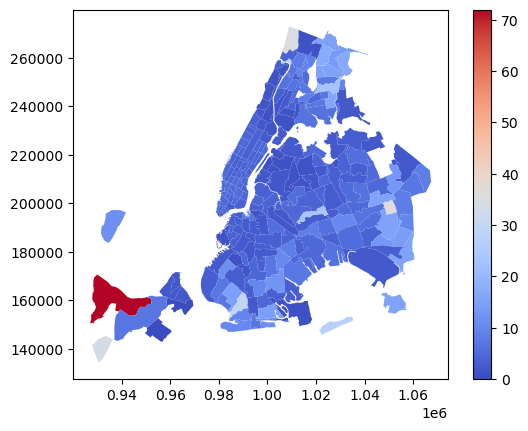

In [302]:
# Count the number of card and cash payments for each PULocationID
df_payments = df_yt15.groupBy("PULocationID").agg(
    count(when(col("payment_type") == 1, True)).alias("card_payments"),
    count(when(col("payment_type") == 2, True)).alias("cash_payments")
)

# Calculate the ratio of card payments to cash payments
df_payments = df_payments.withColumn("payment_ratio", col("card_payments") / col("cash_payments"))

# Convert to pandas dataframe
df_payments_pd = df_payments.toPandas()
df_payments_pd['PULocationID'] = df_payments_pd['PULocationID'].astype(int)

# Merge the geo dataframe with the payments dataframe
gdf_zones_merged = taxi_zones.merge(df_payments_pd, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='payment_ratio', ax=ax, legend=True, cmap='coolwarm')

# fhv janury 2019 2020 2021 2022

# 2.3. ratio of total fare/trip duration for dropoff in the area

# 2.3.1 yellow taxis mars 2019 janury 2020 2021 2022

<AxesSubplot:>

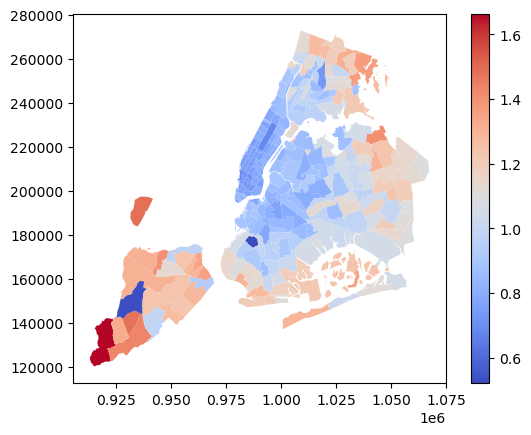

In [308]:
from pyspark.sql.functions import sum, col


df_yt3 = df_yt3.filter(col('trip_duration') != 0)

# Calculate total fare and total trip duration for each DOLocationID
df_ratio = df_yt3.groupBy("DOLocationID").agg(
    sum("fare_amount").alias("total_fare"),
    sum("trip_duration").alias("total_duration")
)

# Calculate the ratio of total fare to total trip duration
df_ratio = df_ratio.withColumn("fare_duration_ratio", col("total_fare") / col("total_duration"))

# Convert to pandas dataframe 
df_ratio_pd = df_ratio.toPandas()
df_ratio_pd['DOLocationID'] = df_ratio_pd['DOLocationID'].astype(int)

# Merge the geodataframe with the ratio dataframe
gdf_zones_merged = taxi_zones.merge(df_ratio_pd, left_on='LocationID', right_on='DOLocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='fare_duration_ratio', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

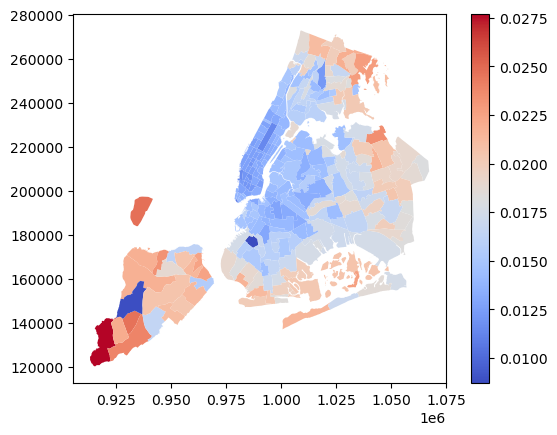

In [311]:
df_yt13 = df_yt13.withColumn("trip_duration", 
                             (col("tpep_dropoff_datetime").cast("long") - col("tpep_pickup_datetime").cast("long")))

df_yt13 = df_yt13.filter(col('trip_duration') != 0)

# Calculate total fare and total trip duration for each DOLocationID
df_ratio = df_yt14.groupBy("DOLocationID").agg(
    sum("fare_amount").alias("total_fare"),
    sum("trip_duration").alias("total_duration")
)

# Calculate the ratio of total fare to total trip duration
df_ratio = df_ratio.withColumn("fare_duration_ratio", col("total_fare") / col("total_duration"))

# Convert to pandas dataframe 
df_ratio_pd = df_ratio.toPandas()
df_ratio_pd['DOLocationID'] = df_ratio_pd['DOLocationID'].astype(int)

# Merge the geodataframe with the ratio dataframe
gdf_zones_merged = taxi_zones.merge(df_ratio_pd, left_on='LocationID', right_on='DOLocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='fare_duration_ratio', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

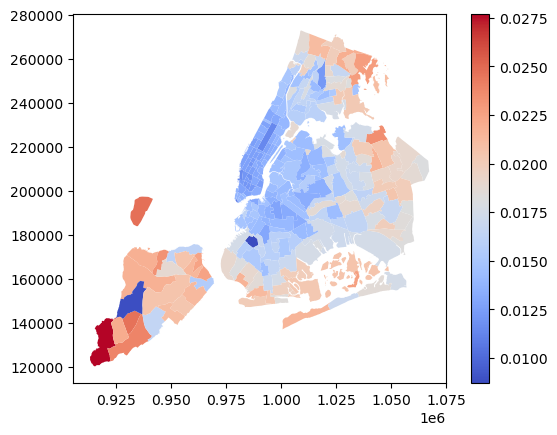

In [312]:
df_yt14 = df_yt14.withColumn("trip_duration", 
                             (col("tpep_dropoff_datetime").cast("long") - col("tpep_pickup_datetime").cast("long")))

df_yt14 = df_yt14.filter(col('trip_duration') != 0)

# Calculate total fare and total trip duration for each DOLocationID
df_ratio = df_yt14.groupBy("DOLocationID").agg(
    sum("fare_amount").alias("total_fare"),
    sum("trip_duration").alias("total_duration")
)

# Calculate the ratio of total fare to total trip duration
df_ratio = df_ratio.withColumn("fare_duration_ratio", col("total_fare") / col("total_duration"))

# Convert to pandas dataframe 
df_ratio_pd = df_ratio.toPandas()
df_ratio_pd['DOLocationID'] = df_ratio_pd['DOLocationID'].astype(int)

# Merge the geodataframe with the ratio dataframe
gdf_zones_merged = taxi_zones.merge(df_ratio_pd, left_on='LocationID', right_on='DOLocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='fare_duration_ratio', ax=ax, legend=True, cmap='coolwarm')


<AxesSubplot:>

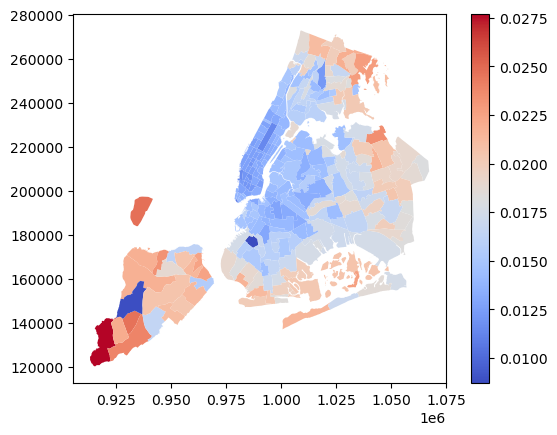

In [313]:
df_yt15 = df_yt15.withColumn("trip_duration", 
                             (col("tpep_dropoff_datetime").cast("long") - col("tpep_pickup_datetime").cast("long")))

df_yt15 = df_yt15.filter(col('trip_duration') != 0)

# Calculate total fare and total trip duration for each DOLocationID
df_ratio = df_yt14.groupBy("DOLocationID").agg(
    sum("fare_amount").alias("total_fare"),
    sum("trip_duration").alias("total_duration")
)

# Calculate the ratio of total fare to total trip duration
df_ratio = df_ratio.withColumn("fare_duration_ratio", col("total_fare") / col("total_duration"))

# Convert to pandas dataframe 
df_ratio_pd = df_ratio.toPandas()
df_ratio_pd['DOLocationID'] = df_ratio_pd['DOLocationID'].astype(int)

# Merge the geodataframe with the ratio dataframe
gdf_zones_merged = taxi_zones.merge(df_ratio_pd, left_on='LocationID', right_on='DOLocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_zones_merged.plot(column='fare_duration_ratio', ax=ax, legend=True, cmap='coolwarm')


# 3.1. average number of dropoffs in the area during that hour the day

# 3.1.1 yellow taxi mars 2019 janury 2020 2021 2022 

In [248]:
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge the shapefile with dropoff data
gdf_zones['DOLocationID'] = gdf_zones['LocationID'].astype(int)
df_dropoffs_hourly = df_yt3.withColumn('hour', hour(df_yt3['tpep_dropoff_datetime']))
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOLocationID', 'hour']).count()
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()
df_dropoffs_hourly_pd['DOLocationID'] = df_dropoffs_hourly_pd['DOLocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_hourly_pd, on='DOLocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='count', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));



interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [315]:


# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge the shapefile with dropoff data
gdf_zones['DOLocationID'] = gdf_zones['LocationID'].astype(int)
df_dropoffs_hourly = df_yt13.withColumn('hour', hour(df_yt13['tpep_dropoff_datetime']))
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOLocationID', 'hour']).count()
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()
df_dropoffs_hourly_pd['DOLocationID'] = df_dropoffs_hourly_pd['DOLocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_hourly_pd, on='DOLocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='count', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [316]:

# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge the shapefile with dropoff data
gdf_zones['DOLocationID'] = gdf_zones['LocationID'].astype(int)
df_dropoffs_hourly = df_yt14.withColumn('hour', hour(df_yt14['tpep_dropoff_datetime']))
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOLocationID', 'hour']).count()
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()
df_dropoffs_hourly_pd['DOLocationID'] = df_dropoffs_hourly_pd['DOLocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_hourly_pd, on='DOLocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='count', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [317]:

# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Merge the shapefile with dropoff data
gdf_zones['DOLocationID'] = gdf_zones['LocationID'].astype(int)
df_dropoffs_hourly = df_yt15.withColumn('hour', hour(df_yt15['tpep_dropoff_datetime']))
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOLocationID', 'hour']).count()
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()
df_dropoffs_hourly_pd['DOLocationID'] = df_dropoffs_hourly_pd['DOLocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_dropoffs_hourly_pd, on='DOLocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='count', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

# 3.1.2 fhv janury 2019 2020 2021 2022 

In [320]:

# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Define new column for the hourly time
df_dropoffs_hourly = df_thv1.withColumn('hour', hour(df_thv1['dropOff_datetime']))

# Group by the DOLocationID and the hour, count the number of dropoffs
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOlocationID', 'hour']).count()

# Convert to pandas dataframe
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()

# Replace infinities with NaN
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.replace([np.inf, -np.inf], np.nan)

# Replace NaN values with a specified placeholder (e.g., 0)
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.fillna(0)

# Now you can convert your column to integer
df_dropoffs_hourly_pd['DOlocationID'] = df_dropoffs_hourly_pd['DOlocationID'].astype(int)

# Merge the geodataframe with the dropoffs dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones_merged = gdf_zones.merge(df_dropoffs_hourly_pd, left_on='LocationID', right_on='DOlocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones_merged[gdf_zones_merged['hour'] == hour].plot(column='count', ax=ax, legend=True, cmap='coolwarm')

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [321]:
# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Define new column for the hourly time
df_dropoffs_hourly = df_thv2.withColumn('hour', hour(df_thv2['dropOff_datetime']))

# Group by the DOLocationID and the hour, count the number of dropoffs
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOlocationID', 'hour']).count()

# Convert to pandas dataframe
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()

# Replace infinities with NaN
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.replace([np.inf, -np.inf], np.nan)

# Replace NaN values with a specified placeholder (e.g., 0)
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.fillna(0)

# Now you can convert your column to integer
df_dropoffs_hourly_pd['DOlocationID'] = df_dropoffs_hourly_pd['DOlocationID'].astype(int)

# Merge the geodataframe with the dropoffs dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones_merged = gdf_zones.merge(df_dropoffs_hourly_pd, left_on='LocationID', right_on='DOlocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones_merged[gdf_zones_merged['hour'] == hour].plot(column='count', ax=ax, legend=True, cmap='coolwarm')

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [322]:
# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Define new column for the hourly time
df_dropoffs_hourly = df_thv3.withColumn('hour', hour(df_thv3['dropOff_datetime']))

# Group by the DOLocationID and the hour, count the number of dropoffs
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOlocationID', 'hour']).count()

# Convert to pandas dataframe
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()

# Replace infinities with NaN
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.replace([np.inf, -np.inf], np.nan)

# Replace NaN values with a specified placeholder (e.g., 0)
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.fillna(0)

# Now you can convert your column to integer
df_dropoffs_hourly_pd['DOlocationID'] = df_dropoffs_hourly_pd['DOlocationID'].astype(int)

# Merge the geodataframe with the dropoffs dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones_merged = gdf_zones.merge(df_dropoffs_hourly_pd, left_on='LocationID', right_on='DOlocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones_merged[gdf_zones_merged['hour'] == hour].plot(column='count', ax=ax, legend=True, cmap='coolwarm')

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [323]:
# load the shapefile
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Define new column for the hourly time
df_dropoffs_hourly = df_thv4.withColumn('hour', hour(df_thv4['dropOff_datetime']))

# Group by the DOLocationID and the hour, count the number of dropoffs
df_dropoffs_hourly = df_dropoffs_hourly.groupby(['DOlocationID', 'hour']).count()

# Convert to pandas dataframe
df_dropoffs_hourly_pd = df_dropoffs_hourly.toPandas()

# Replace infinities with NaN
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.replace([np.inf, -np.inf], np.nan)

# Replace NaN values with a specified placeholder (e.g., 0)
df_dropoffs_hourly_pd = df_dropoffs_hourly_pd.fillna(0)

# Now you can convert your column to integer
df_dropoffs_hourly_pd['DOlocationID'] = df_dropoffs_hourly_pd['DOlocationID'].astype(int)

# Merge the geodataframe with the dropoffs dataframe
gdf_zones['LocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones_merged = gdf_zones.merge(df_dropoffs_hourly_pd, left_on='LocationID', right_on='DOlocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones_merged[gdf_zones_merged['hour'] == hour].plot(column='count', ax=ax, legend=True, cmap='coolwarm')

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

# 3.2 average ratio of tip over total fare amount for pickups in the area at given hour of the day

# 3.2.1 yellow taxi mars 2019 janury 2020 2021 2022 

In [253]:

import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from pyspark.sql.functions import hour

gdf_zones = gpd.read_file('./taxi_zones.shp')

# Calculate tip over total fare ratio and add hour column
df_yt3 = df_yt3.withColumn('tip_over_total', df_yt3['tip_amount'] / df_yt3['total_amount'])
df_yt3 = df_yt3.withColumn('hour', hour(df_yt3['tpep_pickup_datetime']))

# Group by location and hour, calculating the average tip_over_total
df_tip_ratio_hourly = df_yt3.groupby(['PULocationID', 'hour']).mean('tip_over_total')
df_tip_ratio_hourly_pd = df_tip_ratio_hourly.toPandas()
df_tip_ratio_hourly_pd['PULocationID'] = df_tip_ratio_hourly_pd['PULocationID'].astype(int)

# Merge the shapefile with tip ratio data
gdf_zones['PULocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_tip_ratio_hourly_pd, on='PULocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='avg(tip_over_total)', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [326]:
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from pyspark.sql.functions import hour

gdf_zones = gpd.read_file('./taxi_zones.shp')

# Calculate tip over total fare ratio and add hour column
df_yt13 = df_yt13.withColumn('tip_over_total', df_yt13['tip_amount'] / df_yt13['total_amount'])
df_yt13 = df_yt13.withColumn('hour', hour(df_yt13['tpep_pickup_datetime']))

# Group by location and hour, calculating the average tip_over_total
df_tip_ratio_hourly = df_yt13.groupby(['PULocationID', 'hour']).mean('tip_over_total')
df_tip_ratio_hourly_pd = df_tip_ratio_hourly.toPandas()
df_tip_ratio_hourly_pd['PULocationID'] = df_tip_ratio_hourly_pd['PULocationID'].astype(int)

# Merge the shapefile with tip ratio data
gdf_zones['PULocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_tip_ratio_hourly_pd, on='PULocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='avg(tip_over_total)', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [327]:

gdf_zones = gpd.read_file('./taxi_zones.shp')

# Calculate tip over total fare ratio and add hour column
df_yt14 = df_yt14.withColumn('tip_over_total', df_yt14['tip_amount'] / df_yt14['total_amount'])
df_yt14 = df_yt14.withColumn('hour', hour(df_yt14['tpep_pickup_datetime']))

# Group by location and hour, calculating the average tip_over_total
df_tip_ratio_hourly = df_yt14.groupby(['PULocationID', 'hour']).mean('tip_over_total')
df_tip_ratio_hourly_pd = df_tip_ratio_hourly.toPandas()
df_tip_ratio_hourly_pd['PULocationID'] = df_tip_ratio_hourly_pd['PULocationID'].astype(int)

# Merge the shapefile with tip ratio data
gdf_zones['PULocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_tip_ratio_hourly_pd, on='PULocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='avg(tip_over_total)', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…

In [328]:
gdf_zones = gpd.read_file('./taxi_zones.shp')

# Calculate tip over total fare ratio and add hour column
df_yt15 = df_yt15.withColumn('tip_over_total', df_yt15['tip_amount'] / df_yt15['total_amount'])
df_yt15 = df_yt15.withColumn('hour', hour(df_yt15['tpep_pickup_datetime']))

# Group by location and hour, calculating the average tip_over_total
df_tip_ratio_hourly = df_yt15.groupby(['PULocationID', 'hour']).mean('tip_over_total')
df_tip_ratio_hourly_pd = df_tip_ratio_hourly.toPandas()
df_tip_ratio_hourly_pd['PULocationID'] = df_tip_ratio_hourly_pd['PULocationID'].astype(int)

# Merge the shapefile with tip ratio data
gdf_zones['PULocationID'] = gdf_zones['LocationID'].astype(int)
gdf_zones = gdf_zones.merge(df_tip_ratio_hourly_pd, on='PULocationID')

def plot_map(hour):
    fig, ax = plt.subplots(1, 1)
    gdf_zones[gdf_zones['hour'] == hour].plot(column='avg(tip_over_total)', ax=ax, legend=True)

interact(plot_map, hour=widgets.IntSlider(min=0, max=23, step=1, value=0));


interactive(children=(IntSlider(value=0, description='hour', max=23), Output()), _dom_classes=('widget-interac…